<a href="https://colab.research.google.com/github/Freddy-94/MagicSquares/blob/main/GenAlgoMagicSquare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Alfredo Bernal Luna
### April 30th 2023.
### Practice No. 3. Genetic Algorithms: Integer codification for permutations - Magic Square problem.

### Description.

##### A square array of numbers, **usually positive integers**, is called a magic square iff **the sums of the numbers in each row, each column, and both main diagonals are the same**.

##### The **magic constant** of a magic square is the sum of numbers in any row, column, or diagonal of the magic square. For a normal magic square of order n (**a magic square which contains the numbers $1, 2, ..., n^{2}$**), the magic constant is given by:

\begin{align}
        M(n) = n (n^{2} + 1)/2
\end{align}

##### In this practice, we implement a genetic algorithm for finding magic squares for n = 5, and n = 7. That is, our search space will be of 25! and 49!, respectively.

### Cost functions proposed.

### 1. Maximize the number of times a sum (of rows, columns, and diagonals in a potential magic square) correspond with the magic constant.

Let $f : S_{n^{2}} \to  ${0, 1, 2, ... , 2(n+1)}$ $ given by

\begin{align}
        f(s) = \sum_{i=1}^{2(n+1)} success_{i}  
\end{align}

Where $S_{n^{2}}$ denotes the set of all permutations of the set {${1, 2, ..., n^{2}}$}, and $success_{i}$ $\in$ {$0, 1$} for all $i$ $\in$ {$1, 2, ... , 2(n+1)$}.   

### 2. Minimize the error between the magic constant and the sums (of rows, columns, and diagonals in a potential magic square).

Let $f : S_{n^{2}} \to  ${0, 1, 2, ... , 2(n+1)}$ $ given by

\begin{align}
        f(s) = \sum_{i=1}^{2(n+1)} |k - s_{i}|  
\end{align}

Where $S_{n^{2}}$ denotes the set of all permutations of the set {${1, 2, ..., n^{2}}$}, $k$ is the $n$ magic constant, and $s_{i}$ is a sum of a row, column, or diagonal, respectively, for all $i$ $\in$ {$1, 2, ... , 2(n+1)$}.

# Modules to be used in this program:

In [ ]:
import math
from random import uniform, randint, randrange       # for randoms
import numpy as np                                   # for manipulation the table in parents selection easier and binary tournament shuffle
import copy                                          # to save a copy of a parent to perform the order cross-over operator
import matplotlib.pyplot as plt  # to plot

# n-magic constant implementation:

In [ ]:
def magic_constant(n):
    return (n * (n**2 + 1))/2

### n-magic constant implementation test (table of magic constants):

In [ ]:
def magic_constant_table(m):
    print(f"\t\tOrder n\t\t|\t\tMagic constant")
    for i in range(2, m+1):
        print("=======================================================================")
        print(f"\t\t{i}\t\t|\t\t{magic_constant(i)}")
        print("=======================================================================")

magic_constant_table(20)

		Order n		|		Magic constant
		2		|		5.0
		3		|		15.0
		4		|		34.0
		5		|		65.0
		6		|		111.0
		7		|		175.0
		8		|		260.0
		9		|		369.0
		10		|		505.0
		11		|		671.0
		12		|		870.0
		13		|		1105.0
		14		|		1379.0
		15		|		1695.0
		16		|		2056.0
		17		|		2465.0
		18		|		2925.0
		19		|		3439.0
		20		|		4010.0


# Cost functions implementation:

### First we define three functions that we'll need when computing the cost functions defined above, namely:

1.   Compute the sum of the rows in the matrix
2.   Compute the sum of the columns in the matrix
3.   Compute the sum of the diagonals in the matrix

Further, once our genetic algorithm finish, we would like to measure the precision of it by ways of returning the percentage of correct sums in the square returned (regardless the cost function used):

4. Compute the total number of sums (of rows, columns and diagonals) that correspond with the magic constant, along with a percentage of correct sums.


#### 1. Compute the sum of the rows on a given potential magic square:

In [ ]:
def sums_rows_matrix(magic_square_lst):
    """
    Input:  List of integer values representing a potential magic square.
    Output: The list of the sum of the rows of the input potential magic square.
    """
    matrix_size = int(math.sqrt(len(magic_square_lst)))
    rows_sums_list = []
    sum_row = 0
    for i in range(1, len(magic_square_lst)+1):
        sum_row += magic_square_lst[i-1]
        if i % matrix_size == 0 and i != 0:
            rows_sums_list.append(sum_row)
            sum_row = 0
    return rows_sums_list

#### Test of the sum of rows in the potential magic square:

In [ ]:
a = [4, 9, 2, 3, 5, 7, 8, 1, 6]
print(sums_rows_matrix(a))


[15, 15, 15]


#### 2. Compute the sum of the columns on a given potential magic square:

In [ ]:
def sums_columns_matrix(magic_square_lst):
    """
    Input:  List of integer values representing a potential magic square.
    Output: The list of the sum of the columns of the input potential magic square.
    """
    matrix_size = int(math.sqrt(len(magic_square_lst)))
    cols_sums_list = [0]*matrix_size
    sum_col = 0
    for i in range(len(magic_square_lst)):
        for j in range(matrix_size):
            if (i-j) % matrix_size == 0:
                cols_sums_list[j] += magic_square_lst[i]
    return cols_sums_list

#### Test of the sum of columns in the potential magic square:

In [ ]:
a = [4, 9, 2, 3, 5, 7, 8, 1, 6]
print(sums_columns_matrix(a))

[15, 15, 15]


#### 3. Compute the sum of the diagonals on a given potential magic square:

In [ ]:
def sums_diagonals_matrix(magic_square_lst):
    matrix_size = int(math.sqrt(len(magic_square_lst)))
    count = 0
    diags_sums_list = [0]*2
    for i in range(0, len(magic_square_lst)):
        if i % matrix_size == 0:
            diags_sums_list[0] += magic_square_lst[i + count]
            count +=1
    count -= 1
    for i in range(0, len(magic_square_lst)):
        if i % matrix_size == 0:
            diags_sums_list[1] += magic_square_lst[i + count]
            count -= 1
    return diags_sums_list

#### Test of the sum of diagonals in the potential magic square:

In [ ]:
a = [4, 9, 2, 3, 5, 7, 8, 1, 6]
print(sums_diagonals_matrix(a))

[15, 15]


#### 4. Compute the total number of sums (of rows, columns and diagonals) that correspond with the magic constant, along with a percentage of correct sums:

In [ ]:
def perc_correct_sums(magic_square_lst):
    magic_square_size = math.sqrt(len(magic_square_lst))
    magic_cnstnt = magic_constant(magic_square_size)
    max_correct_sums = 2*(magic_square_size + 1)
    all_sums = []
    all_sums += (sums_rows_matrix(magic_square_lst) + sums_columns_matrix(magic_square_lst) + sums_diagonals_matrix(magic_square_lst))
    successes = 0.
    for sum in all_sums:
        # print(sum)
        if sum == magic_cnstnt:
            successes += 1.
    print("======================================================================================")
    print("\tNo. correct sums\t\tPercentage of correct sums obtained")
    print("======================================================================================")
    print(f"\t{successes}\t\t\t\t\t\t{(successes/max_correct_sums)*100}%\n")
    if successes == max_correct_sums:
        print(f"The square {magic_square_lst} is a magic square!")
    return 0

#### Test of the total number of sums (of rows, columns and diagonals) that correspond with the magic constant, along with a percentage of correct sums:

In [ ]:
a = [4, 9, 2, 3, 5, 7, 8, 1, 6]

print(perc_correct_sums(a))

	No. correct sums		Percentage of correct sums obtained
	8.0						100.0%

The square [4, 9, 2, 3, 5, 7, 8, 1, 6] is a magic square!
0


## Cost function 1 implementation: Number of times a sum (of rows, columns, and diagonals in a potential magic square) correspond with the magic constant.

In [ ]:
def count_cost_fun(magic_square_lst):
    magic = magic_constant(math.sqrt(len(magic_square_lst)))
    successes = 0. # Float value, as we needed that type for the parents selection
    all_sums = []
    all_sums += (sums_rows_matrix(magic_square_lst) + sums_columns_matrix(magic_square_lst) + sums_diagonals_matrix(magic_square_lst))
    for sum in all_sums:
        if sum == magic:
            successes += 1.
    return 1/(1+successes) # To convert the problem to a minimization one. Notice the one in the denominator is needed in case No. successes is 0.

#### Test of cost function 1. Notice that with this example we can see clearly that the matrix:
                                  4 9 2
                                  3 5 7
                                  8 1 6
#### corresponds to a magic square.


In [ ]:
a = [4, 9, 2, 3, 5, 7, 8, 1, 6]
print(count_cost_fun(a))

0.1111111111111111


## Cost function 2 implementation: Error between the magic constant and the sums (of rows, columns, and diagonals in the potential magic square).

In [ ]:
def error_cost_fun(magic_square):
    magic = magic_constant(math.sqrt(len(magic_square)))
    error = 0
    all_sums = []
    all_sums += (sums_rows_matrix(magic_square) + sums_columns_matrix(magic_square) + sums_diagonals_matrix(magic_square))
    for sum in all_sums:
        error += abs(magic - sum)
    return error

#### Test of cost function 2. Analogously as the first cost function above, notice that with this example we can see clearly that the matrix:
                                  4 9 2
                                  3 5 7
                                  8 1 6
#### corresponds to a magic square. (The error $\epsilon$ = 0)

In [ ]:
a = [4, 9, 2, 3, 5, 7, 8, 1, 6]
print(error_cost_fun(a))

0.0


# Genetic algorithm implementation.

## 1. Random initial population:

In [ ]:
def initial_population(population_size, magic_square_lst_size):
    """
    This function creates the initial random population to start the algorithm.
    """
    init_pop = []
    # print(magic_square_lst_size)
    for i in range(population_size):
        individual = []
        j = 0
        while j < magic_square_lst_size:
            pot_gen = randint(1, magic_square_lst_size) # potential gen of the individual
            while pot_gen not in individual:
                individual.append(pot_gen)
                j += 1
        init_pop.append(individual)
    return init_pop

#### Test of initial random population.

In [ ]:
pop_size = 1000

my_init_pop = initial_population(pop_size, 9)
print(my_init_pop)

[[4, 9, 8, 7, 5, 3, 6, 2, 1], [8, 1, 4, 2, 9, 7, 6, 5, 3], [7, 4, 8, 9, 1, 2, 6, 3, 5], [8, 1, 9, 6, 5, 4, 7, 2, 3], [2, 9, 5, 4, 7, 3, 1, 6, 8], [7, 8, 3, 5, 2, 1, 9, 4, 6], [6, 7, 3, 8, 1, 4, 2, 9, 5], [2, 8, 9, 1, 4, 5, 6, 7, 3], [7, 6, 9, 4, 5, 1, 2, 3, 8], [3, 9, 8, 6, 4, 7, 1, 5, 2], [9, 5, 6, 3, 1, 8, 7, 4, 2], [2, 3, 6, 7, 8, 1, 5, 4, 9], [9, 4, 1, 5, 8, 6, 2, 7, 3], [2, 5, 1, 6, 4, 8, 9, 3, 7], [5, 1, 7, 4, 8, 9, 6, 3, 2], [7, 4, 2, 3, 1, 6, 8, 5, 9], [8, 6, 9, 7, 5, 2, 4, 3, 1], [1, 8, 9, 5, 7, 3, 6, 2, 4], [2, 7, 5, 1, 6, 8, 4, 9, 3], [7, 2, 3, 9, 4, 8, 1, 5, 6], [2, 5, 4, 9, 6, 1, 8, 3, 7], [8, 3, 6, 9, 7, 5, 4, 1, 2], [8, 5, 9, 2, 4, 6, 1, 3, 7], [3, 8, 7, 6, 2, 1, 4, 9, 5], [2, 6, 7, 5, 8, 3, 1, 9, 4], [9, 3, 7, 2, 5, 6, 8, 4, 1], [4, 9, 5, 6, 7, 1, 3, 2, 8], [1, 9, 8, 5, 4, 3, 6, 7, 2], [4, 8, 2, 6, 3, 7, 1, 5, 9], [2, 1, 4, 3, 7, 5, 9, 6, 8], [8, 9, 2, 1, 5, 4, 7, 6, 3], [6, 9, 4, 7, 8, 5, 2, 1, 3], [5, 8, 4, 1, 3, 9, 2, 6, 7], [7, 1, 8, 9, 5, 6, 4, 2, 3], [8, 9, 6, 1, 

## 2. Table of individuals, with their corresponding apptitudes (evaluation of cost function).

In [ ]:
def table_pop_fitnesss(population, cost_fun):
    """
    This function provides a list of lists, showing the initial population, along its
    corresponding aptitudes (their corresponding values that are obtained after evaluating
    the given cost function)
    """
    table = []
    for individual in population:
        table += [[individual, cost_fun(individual)]]
    return table

#### 2.1 Test of evaluation of cost function 1. Number of times a sum (of rows, columns, and diagonals in a potential magic square) correspond with the magic constant. Notice we're testing with the population generated above "my_init_pop" of size = 1000:

In [ ]:
table_pop_fitness_count_cost_fun = table_pop_fitnesss(my_init_pop, count_cost_fun)
print(table_pop_fitness_count_cost_fun)

[[[1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], 1.0], [[23, 5, 19, 22, 6, 17, 8, 2, 14, 4, 3, 25, 15, 21, 24, 9, 18, 10, 7, 1, 12, 11, 13, 16, 20], 0.5], [[19, 23, 25, 7, 20, 17, 9, 22, 11, 18, 21, 12, 3, 24, 8, 15, 14, 1, 13, 10, 16, 6, 2, 4, 5], 1.0], [[17, 11, 6, 25, 15, 8, 3, 13, 7, 14, 19, 21, 1, 12, 18, 9, 4, 23, 10, 2, 20, 16, 5, 24, 22], 1.0], [[23, 6, 19, 10, 18, 5, 8, 13, 7, 15, 3, 24, 25, 1, 17, 20, 21, 16, 2, 4, 11, 22, 14, 12, 9], 1.0], [[25, 17, 20, 9, 12, 14, 6, 3, 2, 8, 4, 13, 10, 15, 19, 21, 24, 1, 22, 11, 18, 23, 16, 7, 5], 1.0], [[3, 20, 4, 1, 19, 18, 11, 16, 15, 23, 2, 5, 6, 10, 14, 13, 7, 22, 24, 9, 25, 17, 8, 12, 21], 0.5], [[23, 14, 2, 22, 15, 18, 3, 5, 21, 16, 11, 24, 10, 25, 1, 7, 17, 13, 8, 4, 19, 6, 20, 12, 9], 1.0], [[9, 7, 23, 5, 19, 16, 1, 13, 8, 6, 12, 10, 15, 18, 3, 14, 21, 25, 17, 24, 2, 20, 4, 22, 11], 0.5], [[12, 1, 8, 20, 23, 11, 17, 25, 21, 14, 15, 7, 24, 13, 22, 19, 6, 3, 5, 16, 9, 2, 18, 4, 10], 1.0],

#### 2.2 Test of evaluation of cost function 2. Error between the magic constant and the sums (of rows, columns, and diagonals in the potential magic square). Notice we're testing with the population generated above "my_init_pop" of size = 1000:

In [ ]:
table_pop_fitness_error_cost_fun = table_pop_fitnesss(my_init_pop, error_cost_fun)
print(table_pop_fitness_error_cost_fun)

[[[1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], 151.0], [[23, 5, 19, 22, 6, 17, 8, 2, 14, 4, 3, 25, 15, 21, 24, 9, 18, 10, 7, 1, 12, 11, 13, 16, 20], 122.0], [[19, 23, 25, 7, 20, 17, 9, 22, 11, 18, 21, 12, 3, 24, 8, 15, 14, 1, 13, 10, 16, 6, 2, 4, 5], 151.0], [[17, 11, 6, 25, 15, 8, 3, 13, 7, 14, 19, 21, 1, 12, 18, 9, 4, 23, 10, 2, 20, 16, 5, 24, 22], 158.0], [[23, 6, 19, 10, 18, 5, 8, 13, 7, 15, 3, 24, 25, 1, 17, 20, 21, 16, 2, 4, 11, 22, 14, 12, 9], 133.0], [[25, 17, 20, 9, 12, 14, 6, 3, 2, 8, 4, 13, 10, 15, 19, 21, 24, 1, 22, 11, 18, 23, 16, 7, 5], 146.0], [[3, 20, 4, 1, 19, 18, 11, 16, 15, 23, 2, 5, 6, 10, 14, 13, 7, 22, 24, 9, 25, 17, 8, 12, 21], 141.0], [[23, 14, 2, 22, 15, 18, 3, 5, 21, 16, 11, 24, 10, 25, 1, 7, 17, 13, 8, 4, 19, 6, 20, 12, 9], 137.0], [[9, 7, 23, 5, 19, 16, 1, 13, 8, 6, 12, 10, 15, 18, 3, 14, 21, 25, 17, 24, 2, 20, 4, 22, 11], 124.0], [[12, 1, 8, 20, 23, 11, 17, 25, 21, 14, 15, 7, 24, 13, 22, 19, 6, 3, 5, 16, 9, 2,

## 3. Parents selection (by stochastic reminder selection).  

In [ ]:
def stoch_rem_par_sel(table_pop_fitness):
    """
    Stochastic reminder parents selection without replacement implementation
    """
    total_fitness = 0
    exp_val_vector = [] # expected value vector that will have the expected values for each of the individuals of the population
    for i in range(len(table_pop_fitness)):
        total_fitness += table_pop_fitness[i][1]
        exp_val_vector.append(table_pop_fitness[i][1])
    avg_fitness = total_fitness/len(table_pop_fitness)
    exp_val_vector = np.array(exp_val_vector) # converted to a numpy array to perform division easier
    exp_val_vector = exp_val_vector/avg_fitness
    exp_val_vector = exp_val_vector.tolist()  # convert again to a list
    dec_exp_val_vector = [] # Vector that will contain the decimal part of the expected values
    parents = [] # Vector that will have the selected parents to reproduce
    for exp_val in exp_val_vector:
        exp_val_dec = round(exp_val % 1, 2) # decimal part of the expected values, with a precision of 2 decimal values
        dec_exp_val_vector.append(exp_val_dec)
        exp_val_int = int(exp_val) # integer part of each expected value
        if exp_val_int > 0:
            parents += [table_pop_fitness[exp_val_vector.index(exp_val)]] * exp_val_int   # posicion (index) in table pop fitness is the same as the expected values vector
    for dec_exp_val in dec_exp_val_vector:
        flip = uniform(0,1)
        if flip < dec_exp_val: # and table_pop_fitness[dec_exp_val_vector.index(dec_exp_val)] not in parents: Notice we are allowing to repeat parents also by this flip
            parents.append(table_pop_fitness[dec_exp_val_vector.index(dec_exp_val)])     # posicion (index) in table pop fitness is the same as the dec_exp_val_vector values vector
    return parents

#### 3.1. Test of the stochastic reminder parents selection for the table fitness corresponding to the cost function 1 above. Number of times a sum (of rows, columns, and diagonals in a potential magic square) correspond with the magic constant. Notice we're testing with the table fitness "table_pop_fitness_count_cost_fun" obtained before:


In [ ]:
parents_selection_count_fun = stoch_rem_par_sel(table_pop_fitness_count_cost_fun)
print(f"The number of parents selected by the stochastic reminder strategy is of: {len(parents_selection_count_fun)}\n")
print(parents_selection_count_fun)

The number of parents selected by the stochastic reminder strategy is of: 1008

[[[1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], 1.0], [[1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], 1.0], [[1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], 1.0], [[1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], 1.0], [[1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], 1.0], [[1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], 1.0], [[1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], 1.0], [[1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], 1.0], [[1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], 1.0], [[1, 9, 17, 5, 22, 

#### 3.2. Test of the stochastic reminder parents selection for the table fitness corresponding to the cost function 2 above. Error between the magic constant and the sums (of rows, columns, and diagonals in the potential magic square). Notice we're testing with the table fitness "table_pop_fitness_error_cost_fun" obtained before:

In [ ]:
parents_selection_error_cost_fun = stoch_rem_par_sel(table_pop_fitness_error_cost_fun)
print(f"The number of parents selected by the stochastic reminder strategy is of: {len(parents_selection_error_cost_fun)}\n")
print(parents_selection_error_cost_fun)

The number of parents selected by the stochastic reminder strategy is of: 993

[[[1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], 151.0], [[1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], 151.0], [[17, 11, 6, 25, 15, 8, 3, 13, 7, 14, 19, 21, 1, 12, 18, 9, 4, 23, 10, 2, 20, 16, 5, 24, 22], 158.0], [[25, 17, 20, 9, 12, 14, 6, 3, 2, 8, 4, 13, 10, 15, 19, 21, 24, 1, 22, 11, 18, 23, 16, 7, 5], 146.0], [[12, 1, 8, 20, 23, 11, 17, 25, 21, 14, 15, 7, 24, 13, 22, 19, 6, 3, 5, 16, 9, 2, 18, 4, 10], 167.0], [[12, 5, 15, 14, 9, 13, 7, 21, 25, 23, 2, 20, 3, 22, 10, 4, 17, 18, 6, 1, 19, 8, 24, 11, 16], 161.0], [[18, 21, 5, 8, 7, 22, 3, 9, 6, 14, 11, 19, 13, 25, 17, 4, 20, 10, 2, 1, 12, 23, 15, 24, 16], 156.0], [[18, 3, 15, 19, 14, 9, 17, 4, 23, 25, 10, 7, 24, 20, 16, 5, 2, 11, 22, 6, 13, 8, 12, 21, 1], 168.0], [[2, 1, 11, 13, 19, 7, 9, 20, 17, 16, 14, 18, 8, 4, 23, 10, 6, 21, 25, 12, 3, 5, 24, 22, 15], 166.0], [[

## 4. Parents reproduction (by order crossover).  

In [ ]:
def fill_with_zeroes_list(n):
    listofzeros = [0] * n
    return listofzeros

In [ ]:
fill_with_zeroes_list(10)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
def find_rmv_first_non_zero_lst(my_list):
    try:
        a = my_list[my_list.index(next(filter(lambda x: x!=0, my_list)))]
        my_list.remove(a)
        return a
    except:
        print("The list only have zeroes!")

In [ ]:
first_list = [0, 0, 0, 0, 0, 0, 0, 0, 0]
find_rmv_first_non_zero_lst(first_list)
second_list = [6, 7, 9, 4, 2, 1, 8, 5, 3]
print(find_rmv_first_non_zero_lst(second_list))
third_list =[0, 0, 0, 4, 2, 1, 8, 5, 0]
print(find_rmv_first_non_zero_lst(third_list))

The list only have zeroes!
6
4


In [ ]:
def order_crossover(parent1, parent2):
    cpy_parent1 = copy.copy(parent1)
    cpy_parent2 = copy.copy(parent2)
    cpy2_parent1 = copy.copy(parent1)
    cpy2_parent2 = copy.copy(parent2)
    children = []
    size_parents = len(parent1)
    rand_cross_point1 = randrange(size_parents)
    #print(rand_cross_point1)
    rand_cross_point2 = randrange(size_parents)
    #print(rand_cross_point2)
    first_cross_point = min(rand_cross_point1, rand_cross_point2)
    #print(first_cross_point)
    second_cross_point = max(rand_cross_point1, rand_cross_point2)
    #print(second_cross_point)
    parent1_sub_list_zeroes = fill_with_zeroes_list(size_parents)
    parent1_sub_lst = cpy_parent1[first_cross_point:second_cross_point]
    parent1_sub_list_zeroes[first_cross_point:second_cross_point] = parent1_sub_lst
    #print(parent1_sub_list_zeroes)
    for gen in parent1_sub_lst:
        if gen in cpy_parent2:
            cpy_parent2[cpy_parent2.index(gen)] = 0
    #print(parent2)
    for i in range(len(parent1_sub_list_zeroes)):
        if parent1_sub_list_zeroes[i] == 0:
            parent1_sub_list_zeroes[i] = find_rmv_first_non_zero_lst(cpy_parent2)
    #print(parent1_sub_list_zeroes)
    children.append(parent1_sub_list_zeroes)
    rand_cross_point1 = randrange(size_parents)
    #print(rand_cross_point1)
    rand_cross_point2 = randrange(size_parents)
    #print(rand_cross_point2)
    first_cross_point = min(rand_cross_point1, rand_cross_point2)
    #print(first_cross_point)
    second_cross_point = max(rand_cross_point1, rand_cross_point2)
    #print(second_cross_point)
    parent2_sub_list_zeroes = fill_with_zeroes_list(size_parents)
    parent2_sub_lst = cpy2_parent2[first_cross_point:second_cross_point]
    parent2_sub_list_zeroes[first_cross_point:second_cross_point] = parent2_sub_lst
    #print(parent1_sub_list_zeroes)
    for gen in parent2_sub_lst:
        if gen in cpy_parent1:
            cpy_parent1[cpy_parent1.index(gen)] = 0
    #print(parent2)
    for i in range(len(parent2_sub_list_zeroes)):
        if parent2_sub_list_zeroes[i] == 0:
            parent2_sub_list_zeroes[i] = find_rmv_first_non_zero_lst(cpy_parent1)
    #print(parent1_sub_list_zeroes)
    children.append(parent2_sub_list_zeroes)
    return children

In [ ]:
order_crossover([6, 7, 9, 4, 2, 1, 8, 5, 3], [8, 9, 4, 1, 5, 7, 3, 2, 6])

[[8, 9, 1, 4, 5, 7, 3, 2, 6], [6, 9, 4, 1, 5, 7, 2, 8, 3]]

In [ ]:
def reproduction_parents(parents):
    pars = [prnt[0] for prnt in parents] # parents only (without their apptitudes obtained by the cost function) in order to reproduce
    #print(pars)
    children = []
    for i in range(len(pars)):
        for j in range(len(pars)):
            if i != j:
                children += order_crossover(pars[i], pars[j])
    return children

In [ ]:
print(reproduction_parents(parents_selection_error_cost_fun)[0:20])

[[1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], [1, 9, 17, 5, 22, 15, 18, 8, 13, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], [17, 11, 25, 15, 8, 13, 14, 19, 21, 1, 12, 18, 7, 6, 16, 23, 3, 24, 9, 4, 10, 2, 20, 5, 22], [17, 11, 6, 25, 15, 8, 3, 13, 7, 14, 19, 21, 1, 12, 18, 9, 4, 23, 10, 5, 22, 16, 24, 20, 2], [17, 20, 9, 14, 2, 8, 13, 10, 15, 25, 4, 21, 7, 6, 16, 23, 3, 24, 12, 19, 1, 22, 11, 18, 5], [25, 17, 20, 9, 12, 14, 6, 3, 2, 8, 4, 13, 10, 15, 19, 21, 24, 1, 22, 5, 18, 7, 16, 23, 11], [1, 8, 17, 25, 21, 15, 7, 13, 22, 19, 6, 5, 9, 18, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 4], [1, 9, 17, 5, 22, 15, 18, 25, 8, 13, 4, 21, 7, 6, 16, 23, 3, 24, 12, 14, 11, 10, 20, 2, 19], [12, 9, 5, 15, 14, 13, 7, 21, 25, 23, 2, 20, 3, 22, 10, 4, 17, 18, 6, 1, 19, 8, 24, 11, 16], [1, 5, 15, 14, 9, 13, 7, 21, 25, 23, 2, 20, 3, 22, 10, 4, 17, 18, 8, 6, 16, 24, 12, 11, 19], [18, 21, 5, 8, 7, 22, 3, 9, 6, 19, 13, 25, 17, 4, 20, 10, 2, 1, 12, 1

## 5. Mutation of individuals (by insersion).  

In [ ]:
def inser_mut(pot_magic_square):
    rand_index = randint(0, len(pot_magic_square)-1)
    rand_element = pot_magic_square[rand_index]
    new_pos = randint(0, len(pot_magic_square)-1)
    while new_pos == rand_element:
        new_pos = randint(0, len(pot_magic_square)-1)
    pot_magic_square.pop(rand_index)
    pot_magic_square.insert(new_pos, rand_element)
    # print(pot_magic_square)
    return pot_magic_square

#### Test of the insersion mutation operator:

In [ ]:
mutant = inser_mut([6, 7, 9, 4, 2, 1, 8, 5, 3])
print(mutant)

[6, 5, 7, 9, 4, 2, 1, 8, 3]


## 6. Survivors selection (via binary tournament).  

In [ ]:
def bin_tournament_min_survivors(table_pop_fitness):
    """
    This function starts the binary tournament between individuals of a population,
    and returns the selected survivors. Notice the first condition is to guarantee an even size of population
    Future work: Generalize this function for allowing k-matches; i.e., matches of k individuals, where 1<=k<=len(population)
    """
    if len(table_pop_fitness) % 2 == 1: # Validation just for binary tournament
        table_pop_fitness = sorted(table_pop_fitness, key = lambda x : float(x[1])) # order table in terms of values of the cost_fun passed
        del table_pop_fitness[-1]  # This new population removes the least suitable individual; i.e., the individual "least" such
                                   # that cost_fun(least) > cost_fun(individual), for all individual in ordered_population (our problems involve a minimum optimal)
    survivors = []
    for i in range(0, 2):
        np.random.shuffle(table_pop_fitness)
        # print(table_pop_fitness)
        for j in range(0, len(table_pop_fitness), 2):
            if table_pop_fitness[j][1] > table_pop_fitness[j+1][1]: #and table_pop_fitness[j][1] not in survivors: -Notice again we are allowing repetition of survivors
                survivors.append(table_pop_fitness[j+1]) # append survivor with its corresponding aptitude
            elif table_pop_fitness[j+1][1] > table_pop_fitness[j][1]: #and table_pop_fitness[j+1][1] not in survivors:  -Notice again we are allowing repetition of survivors
                survivors.append(table_pop_fitness[j]) # similarly, append survivor with its corresponding aptitude
    return survivors

## Plot of bests, worsts, and average apptitudes of individuals.

In [ ]:
def conv_plot(best_aptitudes, worst_aptitudes, avg_aptitudes):
    pop_size = list(range(1, len(best_aptitudes) + 1))
    plt.scatter(pop_size, best_aptitudes, color='green', label='best')
    plt.plot(pop_size, best_aptitudes, color='green')
    plt.scatter(pop_size, worst_aptitudes, color='red', label='worst')
    plt.plot(pop_size, worst_aptitudes, color='red')
    plt.scatter(pop_size, avg_aptitudes, color='blue', label='average')
    plt.plot(pop_size, avg_aptitudes, color='blue')
    plt.legend()
    plt.xlabel('Number of individuals')
    plt.ylabel('Aptitud')
    plt.title("Convergence plot")
    plt.show()

In [ ]:
def genetic_algo(population_size, pot_magic_square_size_lst, cost_fun, error):
    """
    Genetic algorithm for integer variables
    """
    init_pop = initial_population(population_size, pot_magic_square_size_lst) # random generation of starting population
    evaluation = np.array(table_pop_fitnesss(init_pop, cost_fun), dtype=object) # evaluation of aptitudes via the cost_fun
    #print(evaluation)
    evaluation = sorted(evaluation, key = lambda x : float(x[1])) # order table in terms of values of cost_fun to find the best and worst values found.
    #print(evaluation)
    best = [evaluation[1][0], evaluation[1][1]] # best value obtained for an individual of the starting population (in our problems the bests are the lower values)
    print(best[1])
    worst = [evaluation[-1][0], evaluation[-1][1]]  # worst value obtained for an individual of the starting population (in our problems the worst are the greater values)
    print(worst[1])
    bests = []
    bests.append(best[1])
    worsts = []
    worsts.append(worst[1])
    len_pop = len(evaluation)
    avgs = []
    avg = 0
    for i in range(len(evaluation)):
        avg += evaluation[i][1]
    avgs.append(avg/len(evaluation))
    iteration = 0  # count the number of iterations needed in order to approximate the global optimum
    while abs(best[1] - worst[1]) > error: # Stop criteria - The best and the worst values obtained by all of the individuals are very similar
        parents = stoch_rem_par_sel(evaluation) # parents selected
        children = reproduction_parents(parents) # children obtained after parents reproduction
        #print(children)
        mutated_children = []
        for i in range(len(children)):
            mutated_children.append(inser_mut(children[i]))
        pars = [prnt[0] for prnt in parents] # only parents
        parents_and_children = pars + mutated_children # parents and children fixed in a same bag
        #print(parents_and_children)
        table_parents_children = np.array(table_pop_fitnesss(parents_and_children, cost_fun), dtype=object) # Aptitude table for the parents and the fixed children
        #print(table_parents_children[0])
        survivors =  sorted(bin_tournament_min_survivors(table_parents_children), key = lambda x : float(x[1]))[0:population_size] # Survivors of the best individuals
        # Just take best individuals
        best = [survivors[1][0], survivors[1][1]] # best value obtained for an individual of the population after the binary torunament
        print(best[1])
        bests.append(best[1])
        worst = [survivors[-1][0], survivors[-1][1]] # worst value obtained for an individual of the population after the binary torunament
        print(worst[1])
        worsts.append(worst[1])
        avg = 0
        for j in range(len(survivors)):
            avg += survivors[j][1]
        avgs.append(avg/len(survivors))
        evaluation = survivors
        iteration += 1 # increment the number of iterations to see how many it takes for the algorithm to find a reasonable approximate
        #print(iteration)
    print(f"Numer of iterations needed: {iteration}\n")
    print(f"Global optimum approximation (best individual) is: {best}")
    return best, bests, worst, worsts, avgs, iteration

		Order n		|		Magic constant
		2		|		5.0
		3		|		15.0
		4		|		34.0
		5		|		65.0
		6		|		111.0
		7		|		175.0
		8		|		260.0
		9		|		369.0
		10		|		505.0
72.0
223.0
50.0
72.0
41.0
58.0
35.0
48.0
31.0
40.0
28.0
35.0
24.0
31.0
20.0
26.0
16.0
22.0
15.0
18.0
15.0
16.0
15.0
16.0
15.0
15.0
Numer of iterations needed: 12

Global optimum approximation (best individual) is: [[7, 22, 8, 15, 13, 10, 14, 17, 12, 11, 23, 2, 18, 4, 20, 3, 1, 19, 25, 16, 21, 24, 5, 9, 6], 15.0]


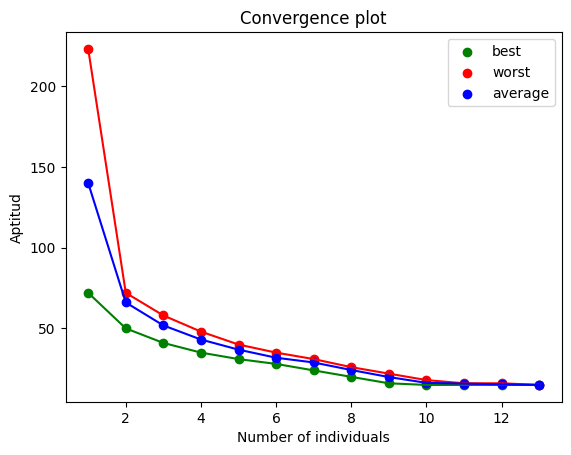

65
64
67
64
65
64
63
67
65
66
70
65
	No. correct sums		Percentage of correct sums obtained
	4.0						33.33333333333333%

99.0
191.0
47.0
76.0
47.0
61.0
36.0
53.0
34.0
44.0
25.0
36.0
23.0
30.0
21.0
25.0
20.0
22.0
17.0
19.0
17.0
18.0
17.0
17.0
Numer of iterations needed: 11

Global optimum approximation (best individual) is: [[6, 19, 7, 20, 16, 24, 14, 13, 11, 4, 3, 5, 22, 23, 12, 25, 8, 2, 9, 17, 10, 18, 21, 1, 15], 17.0]


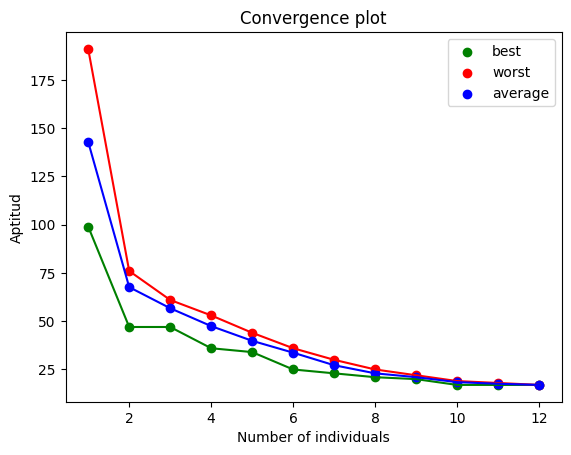

68
66
65
61
65
68
64
65
64
64
66
67
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%

84.0
191.0
50.0
72.0
44.0
54.0
34.0
44.0
34.0
41.0
31.0
34.0
26.0
32.0
24.0
29.0
24.0
26.0
24.0
24.0
Numer of iterations needed: 9

Global optimum approximation (best individual) is: [[24, 25, 3, 6, 9, 10, 4, 11, 22, 18, 16, 23, 13, 5, 7, 2, 8, 21, 14, 17, 12, 1, 19, 20, 15], 24.0]


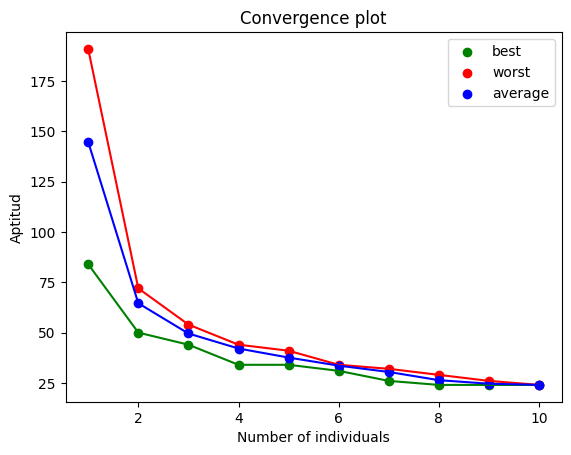

67
65
64
62
67
64
61
67
67
66
70
64
	No. correct sums		Percentage of correct sums obtained
	1.0						8.333333333333332%

95.0
197.0
58.0
74.0
31.0
59.0
31.0
48.0
33.0
41.0
30.0
37.0
28.0
33.0
28.0
31.0
23.0
28.0
23.0
28.0
23.0
25.0
23.0
23.0
Numer of iterations needed: 11

Global optimum approximation (best individual) is: [[17, 9, 20, 16, 1, 15, 6, 7, 24, 14, 10, 23, 11, 12, 8, 4, 5, 21, 13, 25, 18, 22, 3, 2, 19], 23.0]


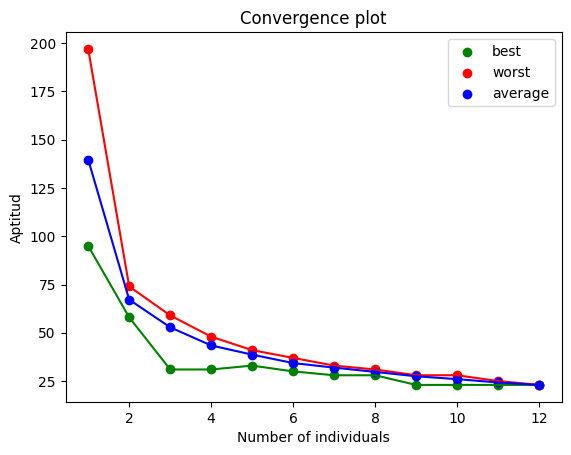

63
66
64
68
64
64
65
62
67
67
66
59
	No. correct sums		Percentage of correct sums obtained
	1.0						8.333333333333332%

88.0
200.0
50.0
75.0
40.0
60.0
37.0
50.0
22.0
40.0
20.0
31.0
18.0
27.0
18.0
20.0
16.0
18.0
16.0
16.0
Numer of iterations needed: 9

Global optimum approximation (best individual) is: [[6, 12, 13, 14, 20, 9, 25, 5, 19, 2, 22, 17, 16, 3, 8, 18, 1, 24, 4, 21, 10, 11, 7, 23, 15], 16.0]


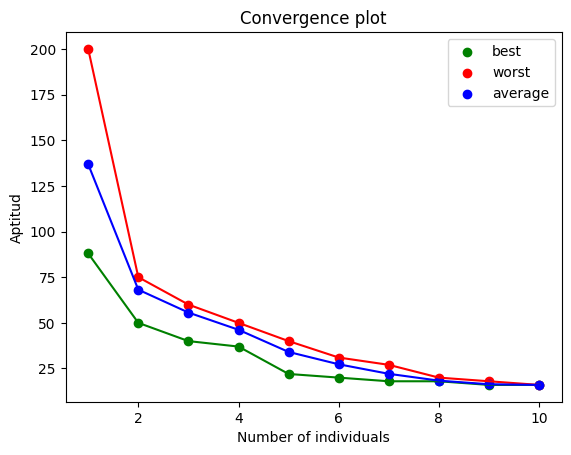

65
60
66
68
66
65
66
65
63
66
66
66
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%

87.0
201.0
41.0
73.0
41.0
53.0
32.0
42.0
32.0
37.0
22.0
34.0
20.0
26.0
17.0
24.0
17.0
20.0
17.0
18.0
17.0
17.0
Numer of iterations needed: 10

Global optimum approximation (best individual) is: [[4, 25, 6, 18, 9, 24, 15, 12, 11, 5, 14, 3, 10, 22, 19, 7, 21, 16, 13, 8, 17, 2, 20, 1, 23], 17.0]


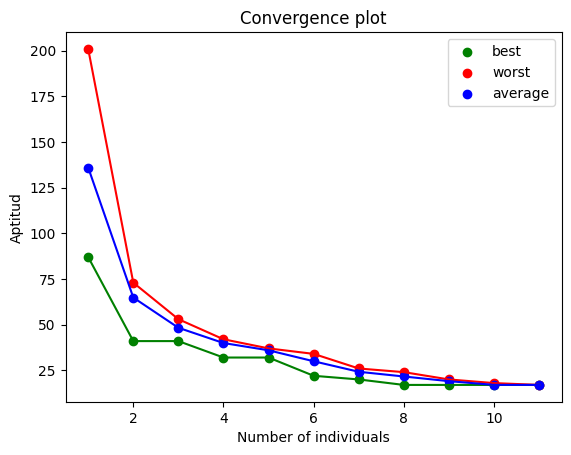

62
67
68
65
63
66
66
64
65
64
65
68
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%

80.0
203.0
49.0
78.0
40.0
62.0
38.0
54.0
36.0
46.0
32.0
38.0
21.0
34.0
21.0
28.0
21.0
25.0
19.0
21.0
19.0
21.0
19.0
19.0
Numer of iterations needed: 11

Global optimum approximation (best individual) is: [[19, 24, 16, 1, 5, 13, 6, 3, 20, 17, 7, 10, 14, 12, 25, 18, 23, 9, 11, 4, 8, 2, 22, 21, 15], 19.0]


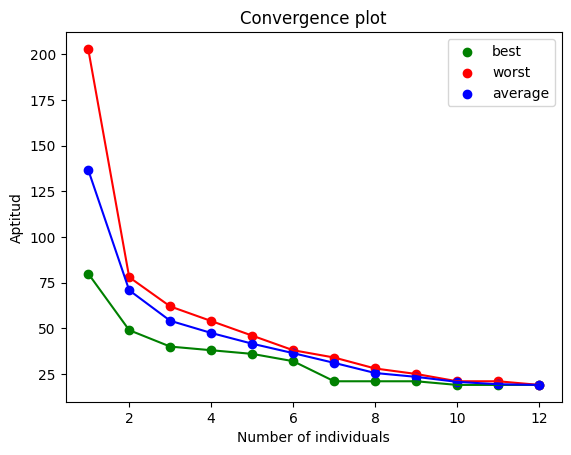

65
59
68
65
68
65
65
64
65
66
65
70
	No. correct sums		Percentage of correct sums obtained
	6.0						50.0%

101.0
200.0
53.0
71.0
42.0
57.0
30.0
46.0
30.0
41.0
17.0
33.0
17.0
30.0
17.0
19.0
17.0
17.0
Numer of iterations needed: 8

Global optimum approximation (best individual) is: [[4, 23, 6, 21, 9, 15, 14, 2, 18, 16, 12, 11, 19, 20, 1, 24, 8, 22, 3, 13, 10, 7, 17, 5, 25], 17.0]


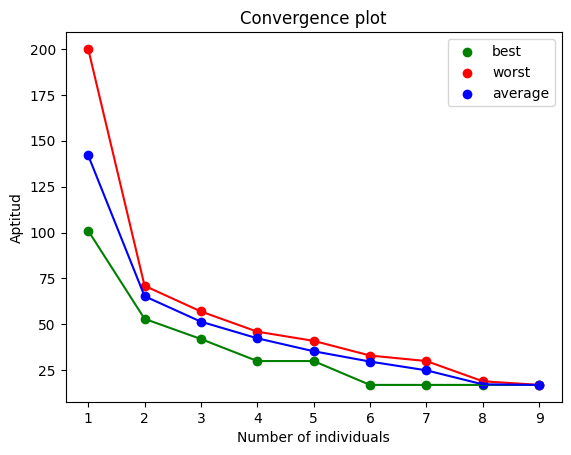

63
65
63
70
64
65
63
66
67
64
65
64
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%

101.0
185.0
44.0
77.0
31.0
51.0
29.0
42.0
27.0
36.0
17.0
29.0
17.0
22.0
17.0
19.0
16.0
17.0
16.0
16.0
Numer of iterations needed: 9

Global optimum approximation (best individual) is: [[9, 12, 20, 6, 17, 22, 16, 8, 7, 10, 11, 18, 13, 3, 19, 1, 4, 23, 25, 14, 21, 15, 2, 24, 5], 16.0]


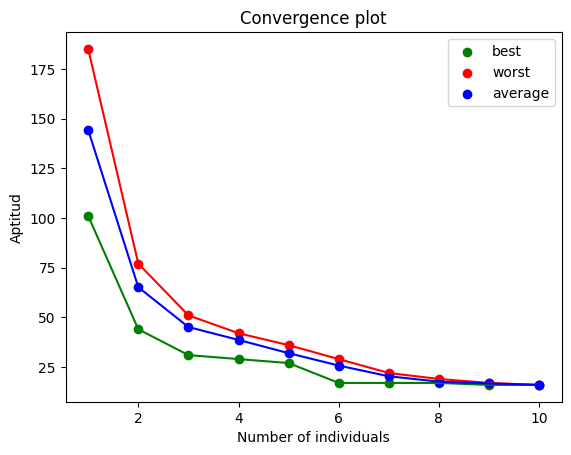

64
63
64
67
67
64
65
66
65
65
68
62
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%

98.0
209.0
48.0
74.0
37.0
56.0
37.0
46.0
34.0
40.0
34.0
40.0
33.0
34.0
32.0
33.0
29.0
31.0
28.0
29.0
28.0
29.0
27.0
28.0
27.0
27.0
Numer of iterations needed: 12

Global optimum approximation (best individual) is: [[15, 6, 11, 21, 16, 4, 2, 25, 10, 19, 14, 24, 8, 9, 7, 13, 12, 20, 18, 3, 17, 22, 1, 5, 23], 27.0]


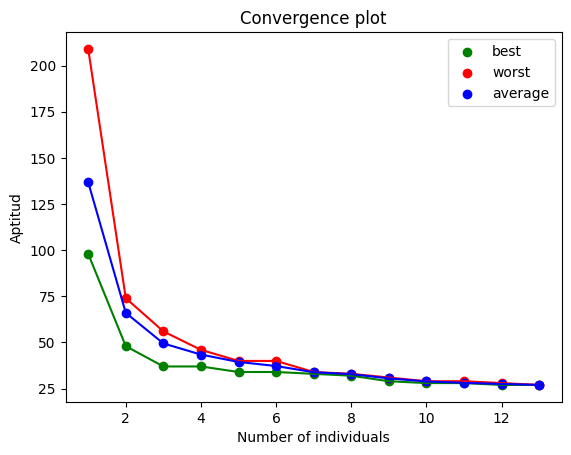

69
60
62
66
68
63
66
65
63
68
66
63
	No. correct sums		Percentage of correct sums obtained
	1.0						8.333333333333332%

96.0
209.0
54.0
69.0
44.0
54.0
26.0
44.0
26.0
37.0
21.0
26.0
18.0
22.0
14.0
20.0
14.0
18.0
14.0
14.0
Numer of iterations needed: 9

Global optimum approximation (best individual) is: [[24, 9, 15, 7, 11, 2, 8, 21, 13, 22, 6, 25, 4, 14, 12, 16, 18, 23, 10, 1, 17, 5, 3, 20, 19], 14.0]


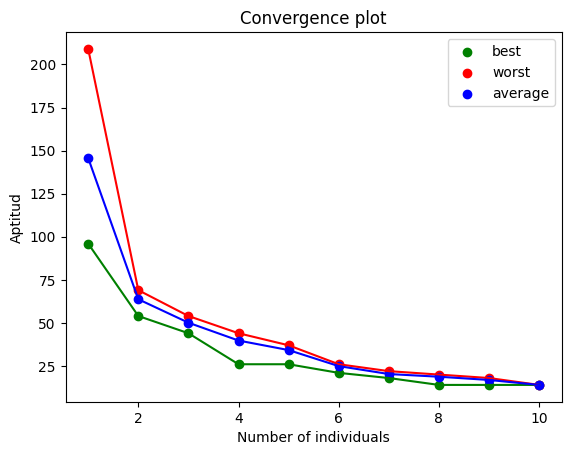

66
66
61
68
64
65
65
66
64
65
65
63
	No. correct sums		Percentage of correct sums obtained
	4.0						33.33333333333333%

76.0
185.0
58.0
71.0
29.0
59.0
27.0
49.0
21.0
40.0
19.0
29.0
19.0
25.0
18.0
23.0
18.0
19.0
18.0
19.0
15.0
19.0
15.0
18.0
15.0
15.0
Numer of iterations needed: 12

Global optimum approximation (best individual) is: [[21, 17, 7, 1, 15, 18, 12, 4, 25, 5, 6, 14, 10, 23, 16, 9, 2, 19, 13, 22, 11, 20, 24, 3, 8], 15.0]


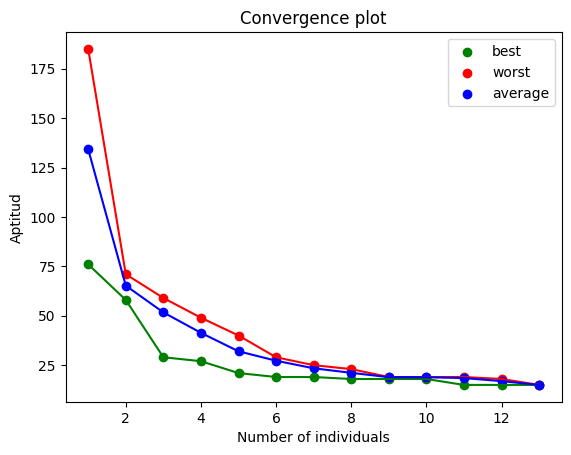

61
64
69
65
66
65
65
64
65
66
64
63
	No. correct sums		Percentage of correct sums obtained
	4.0						33.33333333333333%

66.0
185.0
50.0
74.0
29.0
59.0
32.0
51.0
27.0
42.0
21.0
32.0
17.0
26.0
17.0
21.0
17.0
17.0
Numer of iterations needed: 8

Global optimum approximation (best individual) is: [[3, 7, 21, 25, 10, 8, 24, 13, 1, 17, 16, 4, 22, 18, 9, 23, 20, 6, 2, 14, 12, 11, 5, 19, 15], 17.0]


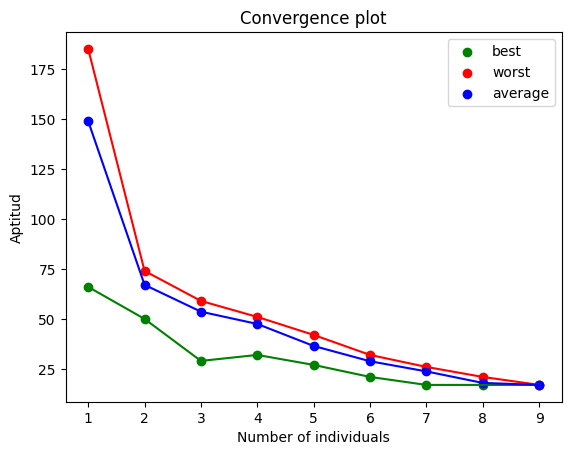

66
63
69
65
62
62
66
67
65
65
66
65
	No. correct sums		Percentage of correct sums obtained
	4.0						33.33333333333333%

89.0
195.0
52.0
76.0
35.0
54.0
35.0
44.0
31.0
39.0
30.0
35.0
28.0
31.0
24.0
29.0
24.0
29.0
20.0
24.0
20.0
20.0
Numer of iterations needed: 10

Global optimum approximation (best individual) is: [[1, 16, 17, 7, 25, 2, 22, 18, 14, 11, 21, 13, 5, 6, 19, 23, 4, 9, 24, 3, 20, 10, 15, 12, 8], 20.0]


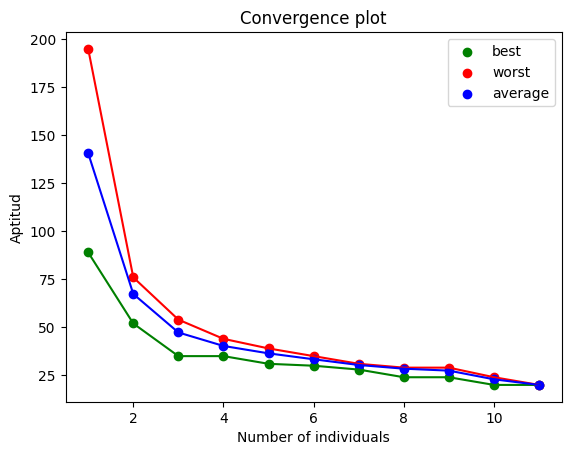

66
67
64
63
65
67
65
64
63
66
60
68
	No. correct sums		Percentage of correct sums obtained
	2.0						16.666666666666664%

73.0
219.0
45.0
79.0
42.0
61.0
32.0
46.0
24.0
37.0
24.0
32.0
24.0
30.0
23.0
27.0
20.0
26.0
20.0
24.0
20.0
20.0
Numer of iterations needed: 10

Global optimum approximation (best individual) is: [[17, 15, 24, 1, 7, 5, 16, 2, 23, 21, 25, 9, 3, 11, 20, 4, 13, 18, 22, 6, 14, 12, 19, 8, 10], 20.0]


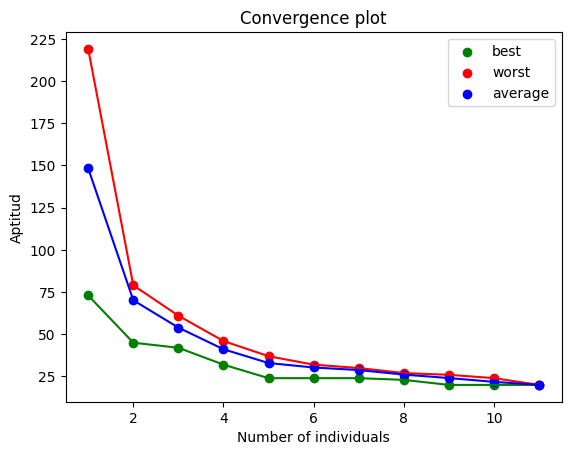

64
67
68
63
63
65
65
66
65
64
68
60
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%

96.0
188.0
57.0
76.0
42.0
55.0
35.0
47.0
30.0
43.0
30.0
36.0
28.0
30.0
28.0
30.0
28.0
30.0
28.0
29.0
28.0
28.0
Numer of iterations needed: 10

Global optimum approximation (best individual) is: [[22, 21, 12, 8, 4, 9, 19, 3, 13, 17, 7, 14, 11, 15, 20, 2, 5, 16, 18, 23, 24, 6, 25, 10, 1], 28.0]


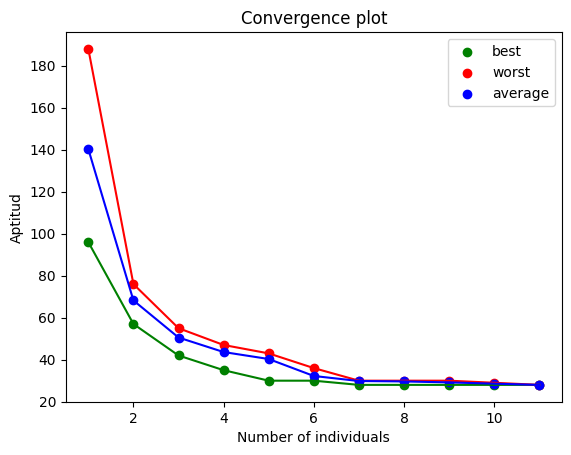

67
61
67
64
66
64
65
67
64
65
71
57
	No. correct sums		Percentage of correct sums obtained
	2.0						16.666666666666664%

96.0
209.0
46.0
80.0
39.0
60.0
32.0
45.0
30.0
40.0
20.0
30.0
18.0
24.0
14.0
18.0
14.0
15.0
14.0
14.0
Numer of iterations needed: 9

Global optimum approximation (best individual) is: [[23, 1, 8, 19, 13, 18, 17, 6, 15, 10, 5, 11, 20, 4, 25, 14, 12, 22, 2, 16, 7, 24, 9, 21, 3], 14.0]


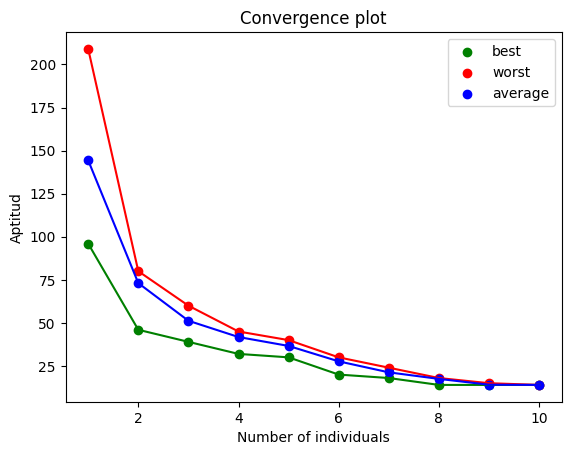

64
66
65
66
64
67
65
65
61
67
65
67
	No. correct sums		Percentage of correct sums obtained
	4.0						33.33333333333333%

85.0
213.0
54.0
76.0
38.0
57.0
29.0
51.0
28.0
44.0
25.0
43.0
27.0
31.0
23.0
27.0
21.0
23.0
17.0
23.0
17.0
21.0
17.0
17.0
Numer of iterations needed: 11

Global optimum approximation (best individual) is: [[4, 19, 7, 11, 24, 22, 5, 18, 10, 12, 20, 23, 21, 1, 3, 13, 2, 6, 25, 17, 8, 15, 14, 16, 9], 17.0]


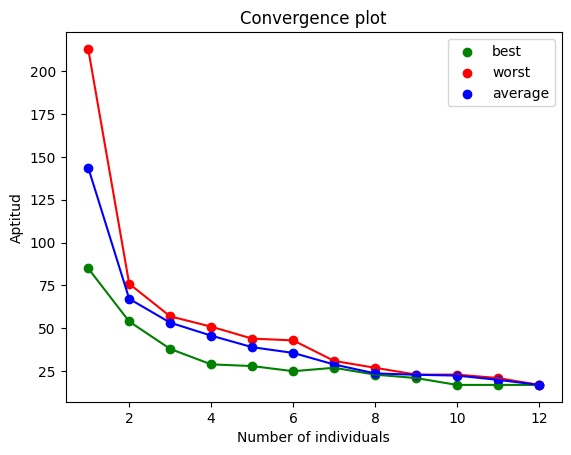

65
67
68
63
62
67
64
66
63
65
64
65
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%

87.0
203.0
45.0
76.0
45.0
58.0
42.0
50.0
35.0
44.0
29.0
40.0
26.0
34.0
21.0
29.0
20.0
24.0
19.0
22.0
17.0
20.0
17.0
19.0
17.0
17.0
Numer of iterations needed: 12

Global optimum approximation (best individual) is: [[2, 10, 23, 16, 13, 22, 24, 4, 6, 5, 9, 7, 17, 14, 19, 11, 8, 1, 18, 25, 21, 15, 20, 12, 3], 17.0]


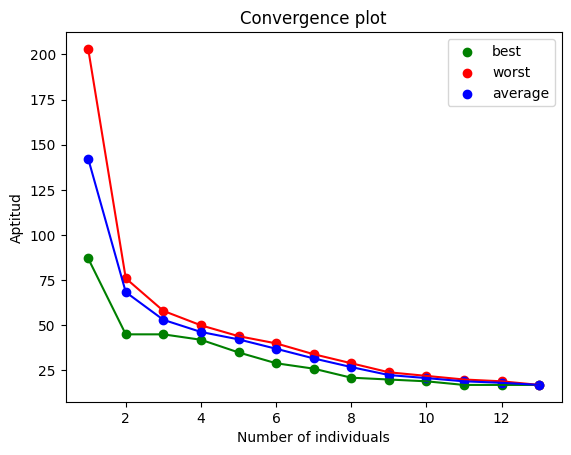

64
61
66
63
71
65
64
65
66
65
64
65
	No. correct sums		Percentage of correct sums obtained
	4.0						33.33333333333333%

90.0
205.0
51.0
75.0
34.0
60.0
34.0
50.0
33.0
44.0
28.0
34.0
24.0
28.0
24.0
27.0
24.0
25.0
24.0
24.0
Numer of iterations needed: 9

Global optimum approximation (best individual) is: [[14, 9, 16, 6, 23, 25, 2, 12, 18, 13, 24, 15, 7, 10, 5, 3, 17, 19, 20, 4, 1, 22, 11, 8, 21], 24.0]


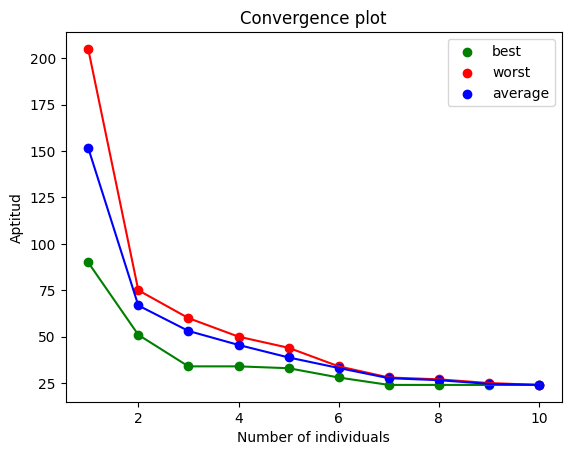

68
70
61
63
63
67
65
65
62
66
64
66
	No. correct sums		Percentage of correct sums obtained
	2.0						16.666666666666664%



In [ ]:
magic_constant_table(10)
for i in range(20):
    best, bests, worst, worsts, avgs, iteration = genetic_algo(50, 25, error_cost_fun, .0001)
    conv_plot(bests, worsts, avgs)
    perc_correct_sums(best[0])

		Order n		|		Magic constant
		2		|		5.0
		3		|		15.0
		4		|		34.0
		5		|		65.0
		6		|		111.0
		7		|		175.0
		8		|		260.0
		9		|		369.0
		10		|		505.0
232.0
694.0
114.0
208.0
114.0
161.0
91.0
129.0
65.0
96.0
48.0
70.0
41.0
48.0
34.0
46.0
30.0
36.0
30.0
32.0
30.0
30.0
Numer of iterations needed: 10

Global optimum approximation (best individual) is: [[44, 1, 5, 18, 49, 39, 17, 22, 7, 12, 41, 31, 28, 30, 43, 6, 36, 15, 13, 35, 26, 24, 48, 42, 33, 20, 2, 10, 3, 23, 40, 47, 9, 19, 37, 32, 46, 29, 8, 25, 14, 21, 4, 45, 11, 16, 27, 38, 34], 30.0]


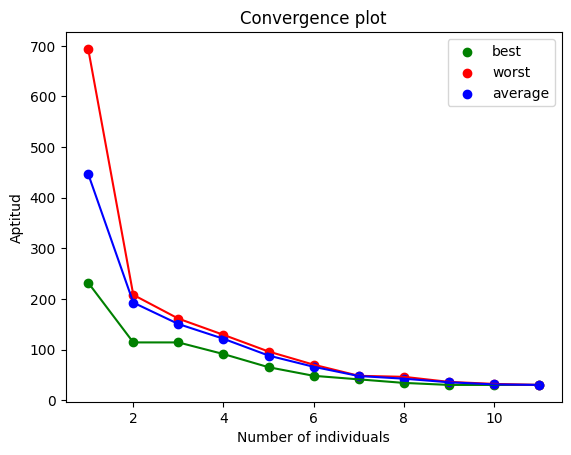

173
171
174
179
178
175
175
172
176
175
178
174
175
175
177
181
	No. correct sums		Percentage of correct sums obtained
	5.0						31.25%

238.0
689.0
136.0
215.0
108.0
162.0
94.0
129.0
75.0
104.0
68.0
84.0
42.0
74.0
26.0
64.0
22.0
55.0
17.0
26.0
17.0
19.0
17.0
17.0
Numer of iterations needed: 11

Global optimum approximation (best individual) is: [[2, 49, 44, 10, 17, 30, 25, 34, 4, 12, 28, 18, 33, 45, 37, 14, 38, 11, 24, 47, 3, 13, 29, 31, 42, 40, 1, 22, 43, 5, 9, 48, 41, 21, 8, 36, 35, 15, 6, 16, 20, 46, 7, 39, 26, 32, 19, 23, 27], 17.0]


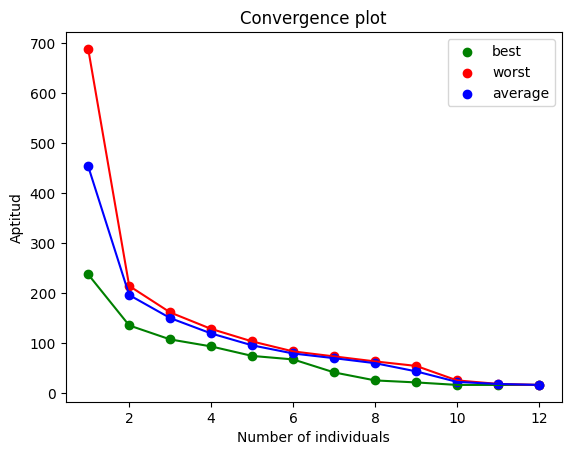

177
174
174
178
175
174
173
172
175
175
177
175
175
176
174
175
	No. correct sums		Percentage of correct sums obtained
	6.0						37.5%

248.0
719.0
138.0
213.0
115.0
160.0
80.0
115.0
58.0
89.0
50.0
68.0
43.0
56.0
38.0
46.0
33.0
38.0
32.0
33.0
27.0
33.0
27.0
27.0
Numer of iterations needed: 11

Global optimum approximation (best individual) is: [[12, 24, 39, 5, 49, 16, 31, 32, 20, 17, 25, 38, 37, 2, 4, 35, 48, 15, 23, 41, 13, 44, 34, 42, 28, 6, 1, 22, 9, 33, 10, 40, 19, 21, 43, 27, 3, 11, 47, 7, 29, 46, 45, 26, 8, 14, 36, 30, 18], 27.0]


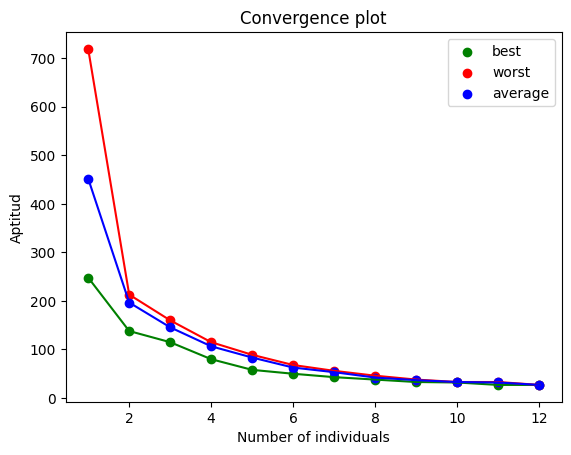

176
171
179
177
175
170
177
173
175
175
174
178
175
175
174
177
	No. correct sums		Percentage of correct sums obtained
	5.0						31.25%

245.0
712.0
123.0
219.0
101.0
159.0
71.0
124.0
62.0
101.0
62.0
81.0
52.0
64.0
52.0
59.0
46.0
53.0
45.0
49.0
45.0
45.0
Numer of iterations needed: 10

Global optimum approximation (best individual) is: [[16, 11, 12, 20, 41, 33, 42, 29, 48, 38, 5, 18, 27, 1, 31, 43, 3, 39, 47, 2, 14, 40, 7, 30, 23, 8, 45, 25, 21, 17, 24, 49, 19, 6, 44, 28, 4, 32, 26, 36, 37, 13, 10, 46, 35, 15, 9, 22, 34], 45.0]


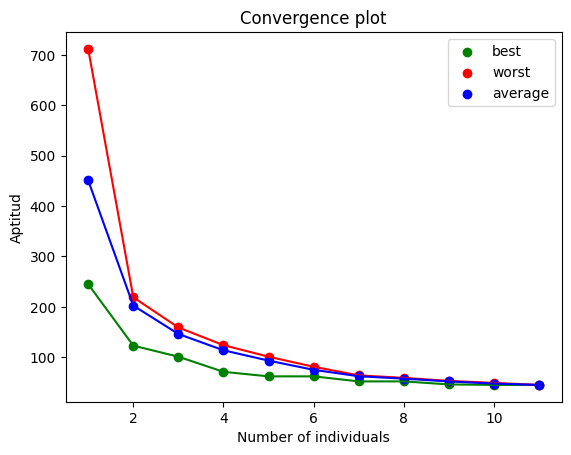

175
166
179
178
180
176
171
175
176
174
177
178
172
173
180
177
	No. correct sums		Percentage of correct sums obtained
	2.0						12.5%

230.0
722.0
148.0
219.0
96.0
165.0
90.0
132.0
61.0
104.0
41.0
71.0
39.0
49.0
31.0
39.0
27.0
32.0
27.0
29.0
27.0
27.0
Numer of iterations needed: 10

Global optimum approximation (best individual) is: [[46, 25, 1, 22, 40, 10, 31, 7, 5, 26, 23, 49, 44, 20, 33, 14, 43, 37, 8, 2, 41, 19, 28, 36, 24, 6, 29, 35, 4, 48, 38, 27, 12, 42, 3, 47, 16, 18, 11, 15, 32, 34, 17, 39, 13, 30, 45, 21, 9], 27.0]


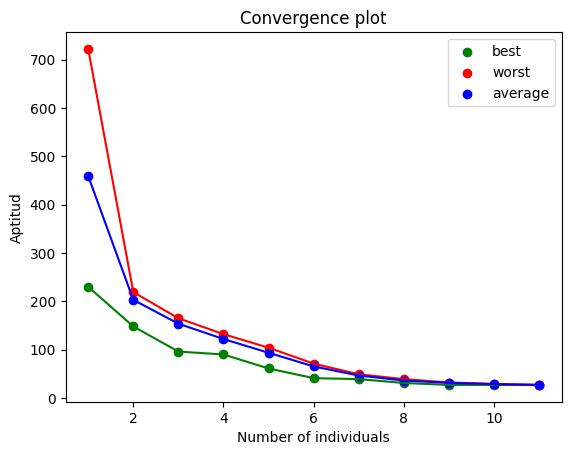

175
174
178
177
174
173
174
173
175
175
174
175
180
173
171
178
	No. correct sums		Percentage of correct sums obtained
	4.0						25.0%

278.0
718.0
133.0
211.0
105.0
156.0
90.0
130.0
53.0
109.0
49.0
86.0
45.0
63.0
41.0
47.0
39.0
43.0
39.0
41.0
37.0
41.0
30.0
39.0
28.0
34.0
28.0
30.0
28.0
28.0
Numer of iterations needed: 14

Global optimum approximation (best individual) is: [[47, 9, 18, 31, 33, 4, 35, 13, 38, 36, 49, 21, 14, 2, 17, 7, 25, 5, 42, 32, 43, 3, 40, 10, 1, 46, 48, 27, 45, 20, 15, 26, 19, 12, 37, 24, 39, 41, 34, 6, 22, 11, 29, 16, 30, 28, 8, 44, 23], 28.0]


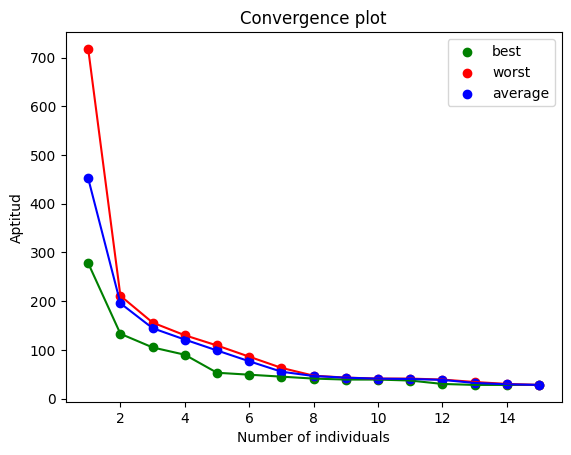

177
173
171
175
174
177
178
178
169
175
174
175
176
178
175
175
	No. correct sums		Percentage of correct sums obtained
	5.0						31.25%

254.0
658.0
145.0
216.0
98.0
164.0
68.0
126.0
44.0
89.0
41.0
69.0
41.0
58.0
40.0
52.0
37.0
41.0
28.0
38.0
28.0
33.0
28.0
28.0
Numer of iterations needed: 11

Global optimum approximation (best individual) is: [[37, 3, 43, 9, 14, 21, 49, 36, 38, 15, 44, 25, 7, 13, 10, 22, 23, 45, 27, 6, 42, 41, 12, 32, 16, 28, 39, 4, 1, 47, 8, 26, 29, 19, 46, 17, 34, 40, 5, 30, 31, 18, 35, 20, 11, 33, 24, 48, 2], 28.0]


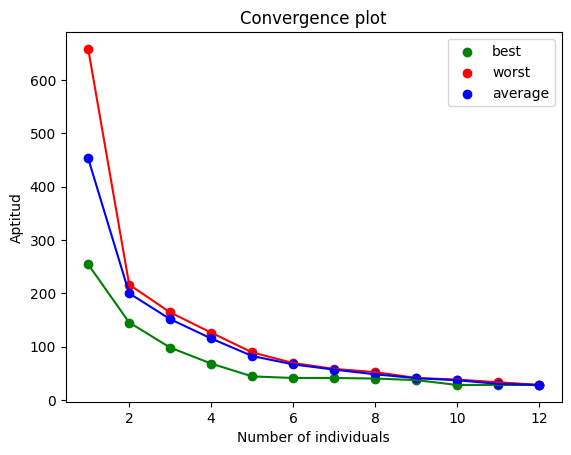

176
178
175
172
176
175
173
177
176
172
178
177
171
174
176
176
	No. correct sums		Percentage of correct sums obtained
	2.0						12.5%

250.0
742.0
121.0
209.0
87.0
156.0
82.0
125.0
68.0
109.0
68.0
92.0
58.0
77.0
54.0
63.0
49.0
55.0
49.0
52.0
49.0
49.0
Numer of iterations needed: 10

Global optimum approximation (best individual) is: [[12, 34, 3, 38, 22, 40, 21, 9, 27, 39, 49, 5, 32, 18, 31, 1, 19, 25, 41, 6, 48, 37, 36, 20, 13, 47, 15, 4, 45, 26, 42, 17, 28, 10, 7, 29, 24, 44, 2, 16, 33, 35, 11, 23, 8, 30, 14, 46, 43], 49.0]


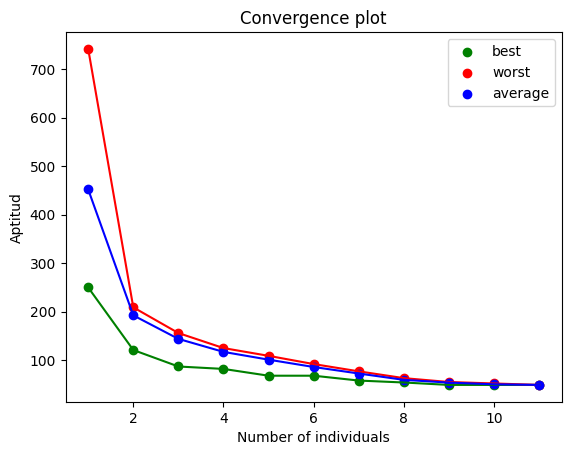

170
179
171
172
175
183
175
174
171
175
174
173
182
176
175
184
	No. correct sums		Percentage of correct sums obtained
	4.0						25.0%

256.0
695.0
156.0
218.0
106.0
161.0
93.0
130.0
79.0
105.0
64.0
96.0
56.0
83.0
52.0
64.0
36.0
58.0
34.0
46.0
34.0
34.0
Numer of iterations needed: 10

Global optimum approximation (best individual) is: [[14, 38, 5, 20, 44, 21, 36, 42, 17, 47, 3, 25, 13, 29, 6, 1, 37, 48, 32, 28, 23, 46, 24, 27, 41, 18, 2, 15, 26, 8, 9, 34, 16, 35, 45, 31, 39, 11, 22, 12, 40, 19, 4, 49, 43, 10, 30, 33, 7], 34.0]


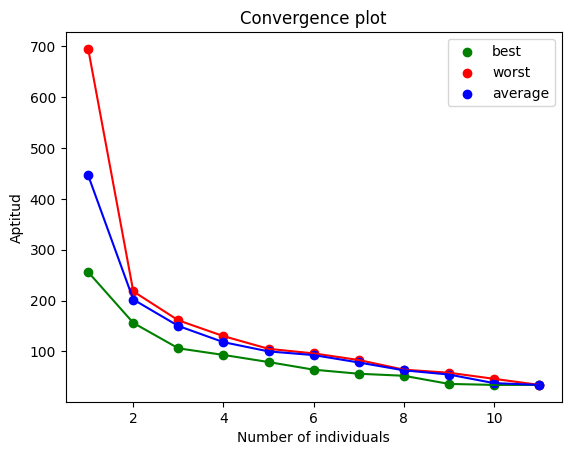

178
176
175
173
173
174
176
169
176
179
178
177
172
174
172
174
	No. correct sums		Percentage of correct sums obtained
	1.0						6.25%

205.0
646.0
133.0
206.0
117.0
162.0
80.0
129.0
70.0
96.0
57.0
81.0
53.0
68.0
49.0
60.0
47.0
51.0
41.0
49.0
41.0
41.0
Numer of iterations needed: 10

Global optimum approximation (best individual) is: [[23, 36, 48, 6, 2, 46, 13, 11, 39, 33, 35, 32, 14, 8, 31, 17, 25, 26, 42, 27, 15, 24, 12, 3, 28, 45, 18, 49, 37, 43, 29, 22, 1, 4, 40, 7, 9, 34, 38, 10, 47, 30, 41, 19, 5, 21, 44, 20, 16], 41.0]


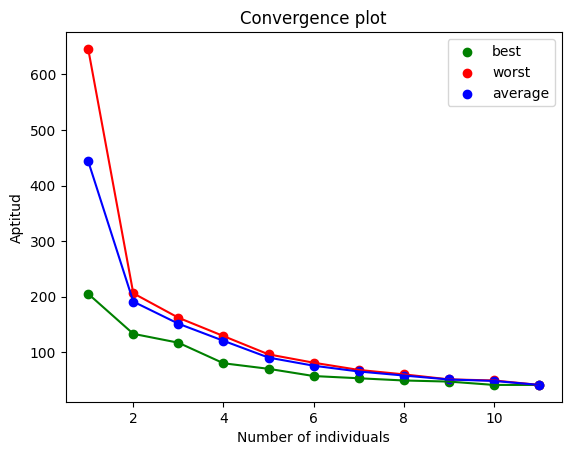

174
172
183
179
176
175
166
174
175
177
176
176
176
171
179
176
	No. correct sums		Percentage of correct sums obtained
	2.0						12.5%

234.0
706.0
146.0
221.0
92.0
161.0
90.0
127.0
62.0
90.0
54.0
65.0
52.0
60.0
52.0
55.0
49.0
53.0
49.0
51.0
49.0
49.0
Numer of iterations needed: 10

Global optimum approximation (best individual) is: [[8, 16, 36, 32, 22, 43, 26, 24, 40, 25, 42, 39, 6, 7, 18, 12, 28, 38, 20, 15, 44, 49, 13, 5, 1, 35, 47, 19, 23, 34, 48, 3, 41, 2, 11, 9, 29, 10, 46, 17, 27, 37, 45, 30, 21, 14, 4, 33, 31], 49.0]


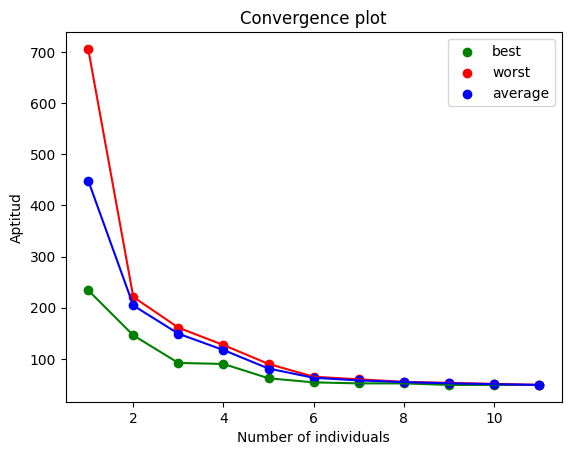

183
183
175
169
162
175
178
176
174
173
176
178
173
175
176
175
	No. correct sums		Percentage of correct sums obtained
	4.0						25.0%

227.0
684.0
116.0
215.0
101.0
152.0
90.0
125.0
73.0
105.0
73.0
84.0
64.0
76.0
64.0
68.0
64.0
64.0
Numer of iterations needed: 8

Global optimum approximation (best individual) is: [[25, 3, 43, 36, 1, 44, 4, 17, 27, 37, 38, 34, 15, 5, 31, 29, 2, 19, 48, 10, 35, 23, 46, 40, 18, 16, 28, 13, 41, 24, 33, 11, 6, 22, 39, 21, 32, 12, 7, 26, 49, 30, 20, 14, 8, 47, 42, 9, 45], 64.0]


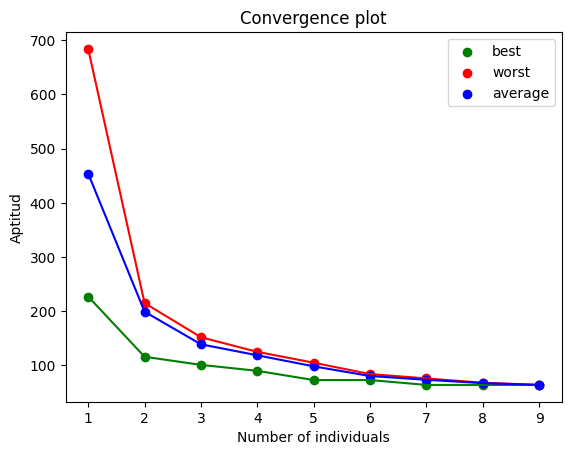

156
173
174
184
176
177
185
178
175
175
176
173
177
171
172
170
	No. correct sums		Percentage of correct sums obtained
	2.0						12.5%

278.0
639.0
146.0
215.0
116.0
163.0
86.0
121.0
77.0
96.0
59.0
78.0
55.0
67.0
48.0
56.0
47.0
48.0
47.0
47.0
Numer of iterations needed: 9

Global optimum approximation (best individual) is: [[42, 32, 21, 13, 45, 11, 9, 35, 6, 34, 8, 16, 43, 23, 2, 14, 30, 26, 27, 41, 39, 31, 10, 5, 24, 48, 38, 28, 40, 20, 12, 22, 17, 29, 36, 7, 44, 47, 33, 18, 19, 3, 15, 46, 25, 49, 4, 1, 37], 47.0]


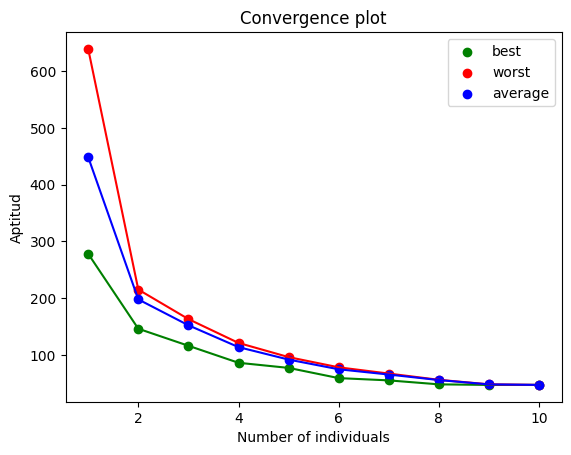

173
165
179
184
176
171
177
172
172
174
175
175
182
175
175
174
	No. correct sums		Percentage of correct sums obtained
	4.0						25.0%

233.0
664.0
139.0
217.0
106.0
163.0
86.0
129.0
73.0
105.0
60.0
83.0
55.0
73.0
48.0
63.0
46.0
51.0
45.0
46.0
45.0
46.0
45.0
45.0
Numer of iterations needed: 11

Global optimum approximation (best individual) is: [[49, 21, 16, 1, 5, 41, 38, 36, 40, 31, 7, 13, 20, 29, 12, 35, 9, 32, 42, 10, 28, 2, 30, 44, 15, 4, 37, 39, 25, 6, 27, 48, 33, 22, 14, 43, 24, 3, 47, 34, 18, 17, 11, 19, 46, 23, 45, 26, 8], 45.0]


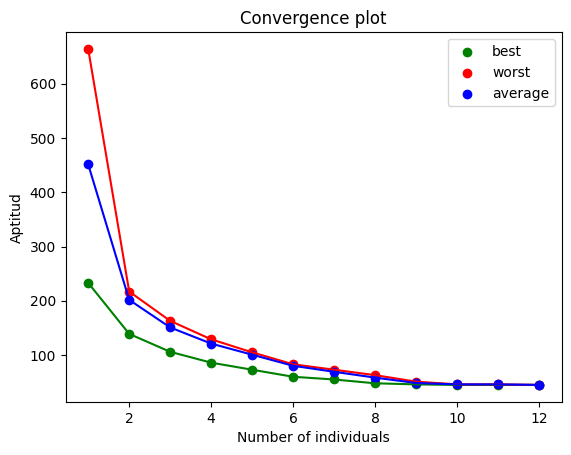

171
176
168
171
175
186
178
178
175
176
173
176
174
173
172
177
	No. correct sums		Percentage of correct sums obtained
	2.0						12.5%

261.0
710.0
125.0
218.0
110.0
164.0
86.0
126.0
71.0
99.0
52.0
79.0
52.0
67.0
50.0
60.0
49.0
54.0
47.0
50.0
46.0
47.0
46.0
46.0
Numer of iterations needed: 11

Global optimum approximation (best individual) is: [[32, 22, 9, 42, 5, 44, 19, 20, 14, 18, 36, 37, 30, 28, 41, 40, 38, 16, 15, 7, 21, 6, 49, 46, 13, 26, 33, 2, 24, 10, 25, 11, 27, 47, 35, 4, 29, 3, 43, 45, 12, 31, 48, 8, 34, 17, 23, 1, 39], 46.0]


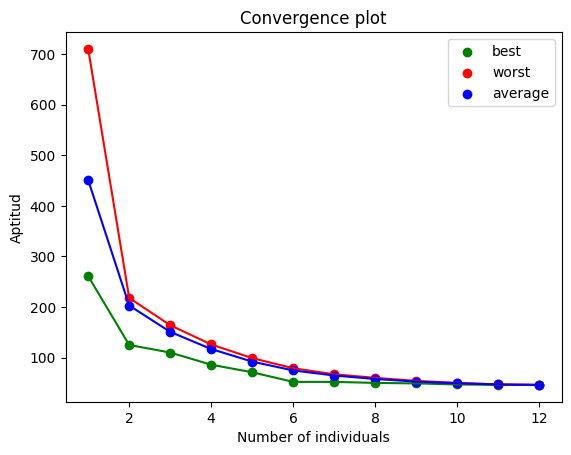

173
183
178
175
179
167
170
175
172
173
178
178
174
175
175
179
	No. correct sums		Percentage of correct sums obtained
	4.0						25.0%

247.0
663.0
149.0
220.0
109.0
162.0
87.0
130.0
76.0
103.0
67.0
83.0
57.0
70.0
54.0
60.0
51.0
57.0
51.0
51.0
Numer of iterations needed: 9

Global optimum approximation (best individual) is: [[29, 36, 31, 10, 30, 41, 7, 26, 47, 46, 20, 3, 32, 1, 25, 13, 23, 6, 43, 24, 45, 33, 35, 2, 39, 27, 5, 28, 42, 9, 12, 34, 15, 21, 40, 4, 11, 44, 16, 37, 14, 48, 18, 22, 19, 49, 17, 38, 8], 51.0]


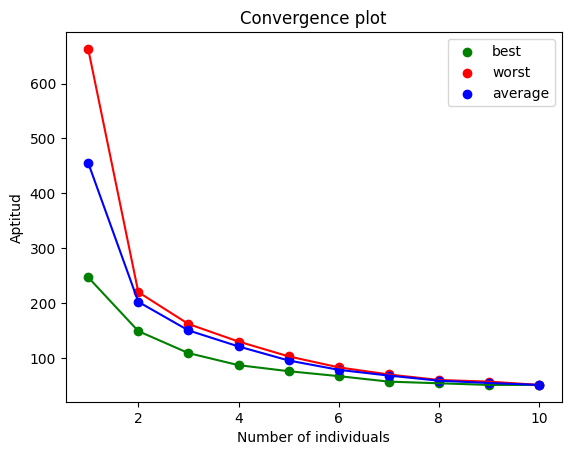

184
175
179
169
173
174
171
177
173
177
174
172
175
177
175
162
	No. correct sums		Percentage of correct sums obtained
	3.0						18.75%

211.0
684.0
131.0
211.0
103.0
162.0
89.0
130.0
76.0
102.0
59.0
80.0
54.0
66.0
54.0
57.0
53.0
54.0
53.0
53.0
Numer of iterations needed: 9

Global optimum approximation (best individual) is: [[33, 1, 21, 45, 36, 17, 27, 35, 12, 39, 18, 3, 24, 47, 49, 31, 8, 22, 32, 34, 4, 19, 48, 43, 6, 5, 10, 41, 11, 25, 28, 40, 29, 16, 15, 9, 38, 14, 37, 26, 44, 2, 20, 13, 23, 7, 46, 30, 42], 53.0]


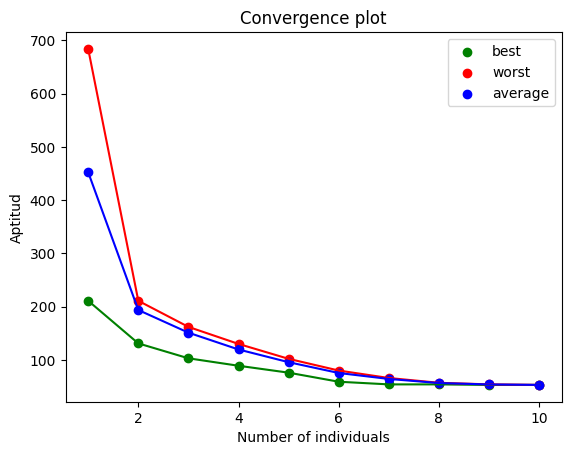

180
178
180
172
164
170
181
176
168
176
175
177
175
178
174
175
	No. correct sums		Percentage of correct sums obtained
	3.0						18.75%

245.0
683.0
147.0
212.0
114.0
162.0
82.0
130.0
81.0
106.0
69.0
83.0
68.0
73.0
51.0
69.0
45.0
68.0
42.0
66.0
41.0
44.0
40.0
41.0
38.0
40.0
38.0
38.0
Numer of iterations needed: 13

Global optimum approximation (best individual) is: [[39, 36, 3, 26, 10, 37, 25, 16, 17, 45, 18, 49, 8, 21, 23, 1, 28, 35, 42, 7, 33, 19, 40, 14, 15, 13, 44, 34, 4, 47, 32, 41, 6, 43, 2, 24, 11, 22, 12, 48, 30, 29, 46, 20, 31, 27, 9, 5, 38], 38.0]


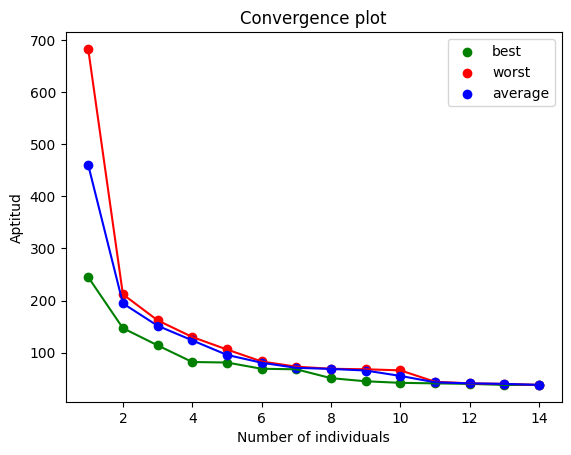

176
174
169
179
175
176
176
171
172
175
174
177
174
182
173
179
	No. correct sums		Percentage of correct sums obtained
	2.0						12.5%

248.0
654.0
154.0
216.0
109.0
161.0
84.0
132.0
77.0
99.0
70.0
81.0
59.0
71.0
51.0
59.0
49.0
51.0
49.0
49.0
Numer of iterations needed: 9

Global optimum approximation (best individual) is: [[12, 48, 29, 6, 27, 35, 24, 14, 38, 46, 30, 28, 3, 7, 18, 5, 33, 23, 42, 41, 16, 43, 17, 15, 31, 13, 39, 19, 25, 22, 2, 36, 10, 47, 26, 21, 37, 11, 45, 34, 1, 32, 40, 8, 44, 4, 20, 9, 49], 49.0]


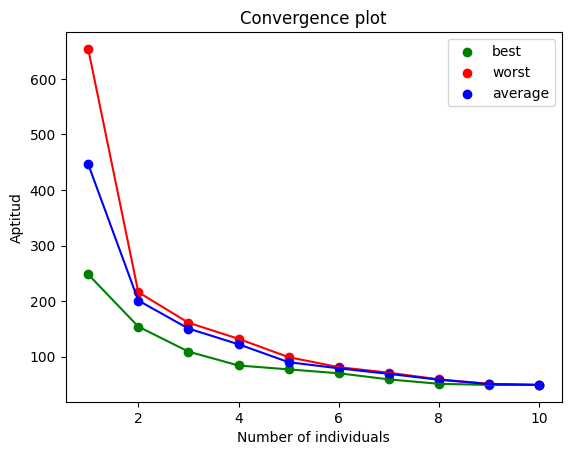

181
166
178
177
168
181
174
173
175
180
175
174
175
173
174
179
	No. correct sums		Percentage of correct sums obtained
	3.0						18.75%

234.0
713.0
142.0
217.0
100.0
157.0
71.0
120.0
63.0
90.0
55.0
75.0
53.0
65.0
51.0
55.0
48.0
51.0
47.0
48.0
47.0
47.0
Numer of iterations needed: 10

Global optimum approximation (best individual) is: [[6, 44, 15, 27, 26, 35, 23, 32, 36, 4, 5, 41, 29, 33, 38, 9, 43, 20, 3, 47, 13, 8, 28, 7, 42, 37, 16, 46, 48, 31, 40, 12, 1, 25, 11, 24, 21, 19, 34, 45, 14, 18, 17, 2, 49, 39, 22, 10, 30], 47.0]


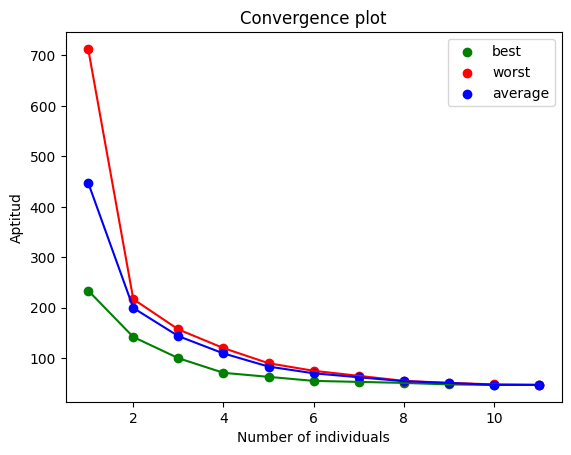

176
180
173
184
168
175
169
173
171
177
179
175
176
174
172
175
	No. correct sums		Percentage of correct sums obtained
	3.0						18.75%



In [ ]:
magic_constant_table(10)
for i in range(20):
    best, bests, worst, worsts, avgs, iteration = genetic_algo(50, 49, error_cost_fun, .001)
    conv_plot(bests, worsts, avgs)
    perc_correct_sums(best[0])

		Order n		|		Magic constant
		2		|		5.0
		3		|		15.0
		4		|		34.0
		5		|		65.0
		6		|		111.0
		7		|		175.0
		8		|		260.0
		9		|		369.0
		10		|		505.0
0.3333333333333333
1.0
0.25
0.3333333333333333
0.25
0.25
Numer of iterations needed: 2

Global optimum approximation (best individual) is: [[20, 8, 7, 25, 22, 10, 6, 9, 21, 11, 4, 24, 2, 13, 5, 15, 17, 14, 18, 1, 16, 12, 23, 3, 19], 0.25]


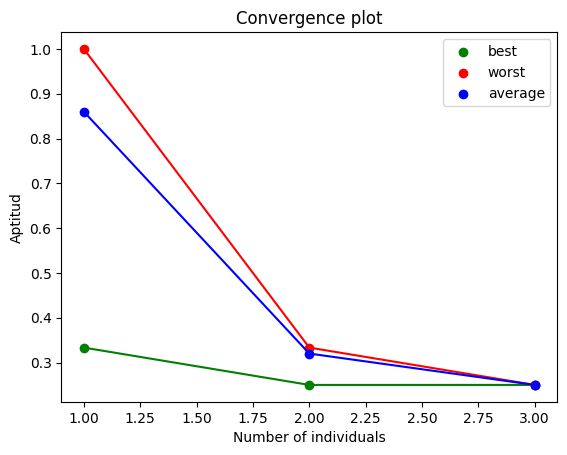

82
57
48
65
73
65
67
55
80
58
65
78
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%

0.3333333333333333
1.0
0.25
0.3333333333333333
0.25
0.25
Numer of iterations needed: 2

Global optimum approximation (best individual) is: [[16, 11, 3, 15, 4, 22, 9, 14, 24, 19, 1, 10, 13, 21, 5, 20, 8, 18, 12, 7, 6, 25, 17, 2, 23], 0.25]


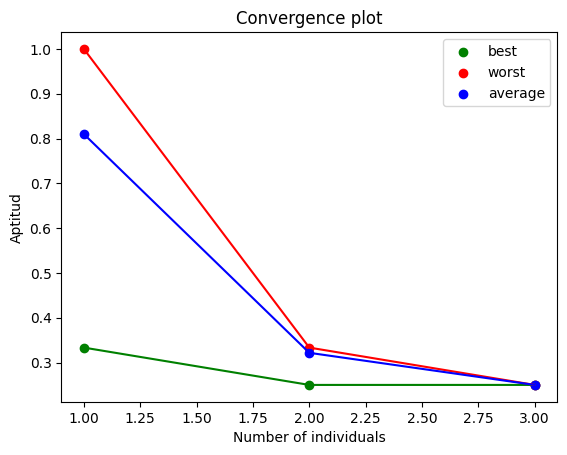

49
88
50
65
73
65
63
65
74
58
73
55
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%

0.5
1.0
0.25
0.3333333333333333
0.25
0.25
Numer of iterations needed: 2

Global optimum approximation (best individual) is: [[12, 4, 22, 9, 3, 14, 8, 10, 23, 25, 20, 18, 19, 1, 13, 2, 5, 21, 15, 16, 7, 24, 6, 17, 11], 0.25]


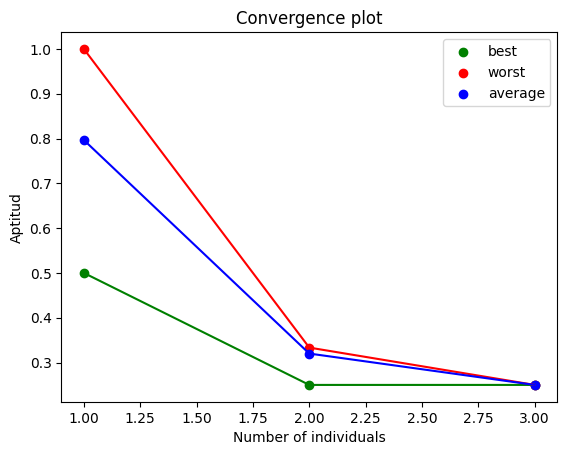

50
80
71
59
65
55
59
78
65
68
65
57
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%

0.3333333333333333
1.0
0.2
0.3333333333333333
0.14285714285714285
0.2
0.125
0.14285714285714285
0.125
0.125
Numer of iterations needed: 4

Global optimum approximation (best individual) is: [[8, 21, 20, 12, 4, 14, 15, 11, 6, 19, 5, 10, 23, 3, 24, 16, 1, 22, 17, 9, 13, 18, 25, 7, 2], 0.125]


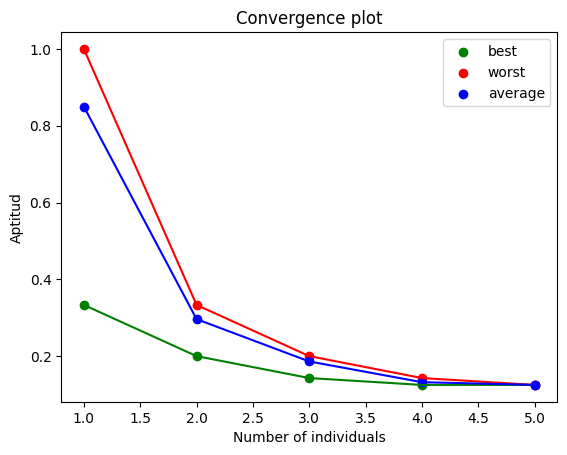

65
65
65
65
65
56
65
101
45
58
65
47
	No. correct sums		Percentage of correct sums obtained
	7.0						58.333333333333336%

0.5
1.0
0.25
0.3333333333333333
0.2
0.25
0.2
0.2
Numer of iterations needed: 3

Global optimum approximation (best individual) is: [[25, 17, 7, 1, 15, 8, 11, 19, 14, 13, 9, 3, 24, 18, 10, 6, 4, 16, 12, 22, 2, 21, 23, 20, 5], 0.2]


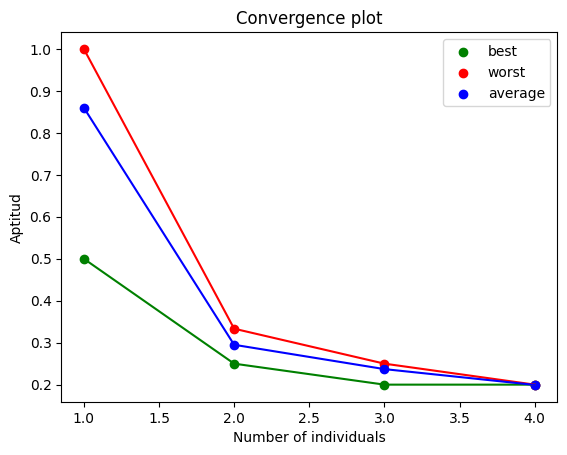

65
65
64
60
71
50
56
89
65
65
77
59
	No. correct sums		Percentage of correct sums obtained
	4.0						33.33333333333333%

0.3333333333333333
1.0
0.2
0.3333333333333333
0.16666666666666666
0.2
0.16666666666666666
0.2
0.16666666666666666
0.2
0.16666666666666666
0.16666666666666666
Numer of iterations needed: 5

Global optimum approximation (best individual) is: [[1, 15, 11, 24, 2, 3, 13, 17, 6, 20, 19, 22, 25, 12, 5, 23, 18, 8, 7, 9, 14, 10, 4, 16, 21], 0.16666666666666666]


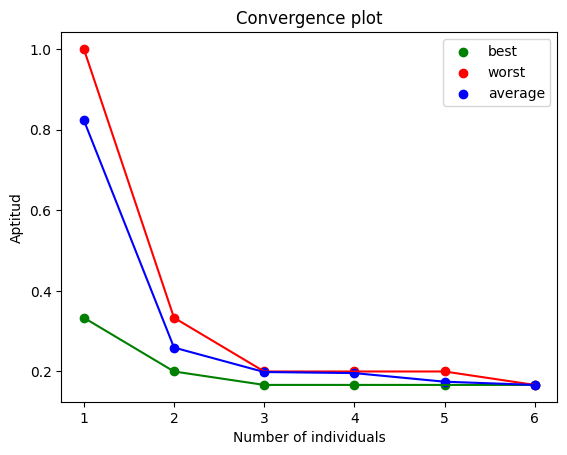

53
59
83
65
65
60
78
65
65
57
67
65
	No. correct sums		Percentage of correct sums obtained
	5.0						41.66666666666667%

0.3333333333333333
1.0
0.25
0.3333333333333333
0.2
0.25
0.16666666666666666
0.2
0.16666666666666666
0.2
0.16666666666666666
0.2
0.16666666666666666
0.16666666666666666
Numer of iterations needed: 6

Global optimum approximation (best individual) is: [[8, 22, 11, 15, 9, 3, 12, 19, 13, 20, 10, 1, 7, 21, 6, 2, 18, 5, 24, 16, 4, 17, 23, 25, 14], 0.16666666666666666]


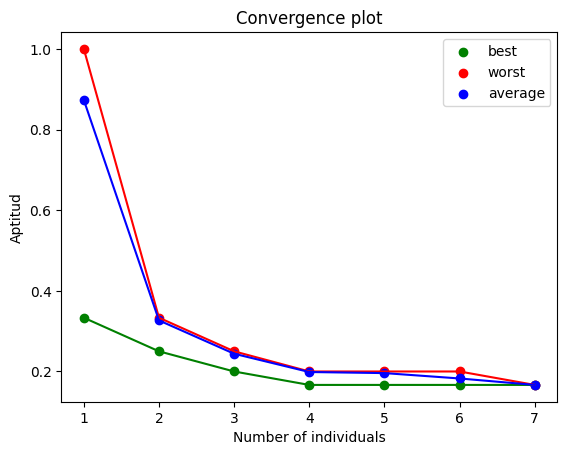

65
67
45
65
83
27
70
65
98
65
65
51
	No. correct sums		Percentage of correct sums obtained
	5.0						41.66666666666667%

0.5
1.0
0.25
0.3333333333333333
0.25
0.25
Numer of iterations needed: 2

Global optimum approximation (best individual) is: [[16, 21, 4, 1, 23, 19, 7, 11, 3, 25, 2, 18, 17, 20, 24, 5, 13, 10, 15, 22, 12, 8, 6, 9, 14], 0.25]


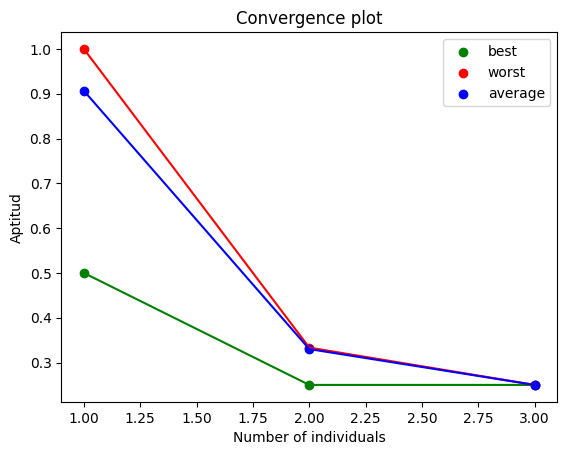

65
65
81
65
49
54
67
48
48
108
69
68
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%

0.3333333333333333
1.0
0.2
0.3333333333333333
0.2
0.25
0.2
0.2
Numer of iterations needed: 3

Global optimum approximation (best individual) is: [[14, 9, 16, 18, 1, 17, 22, 13, 5, 8, 23, 3, 19, 20, 24, 4, 25, 6, 10, 15, 7, 2, 11, 12, 21], 0.2]


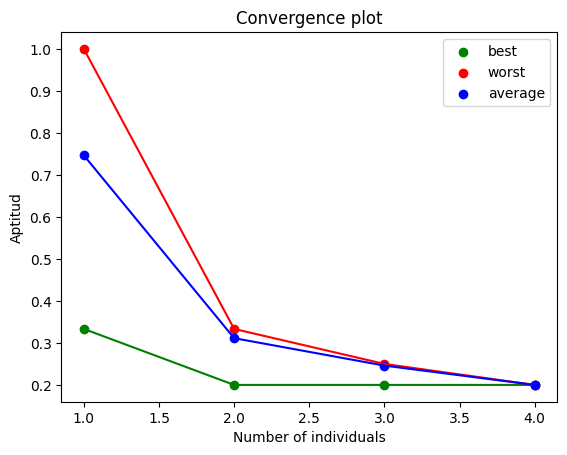

58
65
89
60
53
65
61
65
65
69
86
57
	No. correct sums		Percentage of correct sums obtained
	4.0						33.33333333333333%

0.3333333333333333
1.0
0.2
0.3333333333333333
0.16666666666666666
0.2
0.16666666666666666
0.2
0.16666666666666666
0.16666666666666666
Numer of iterations needed: 4

Global optimum approximation (best individual) is: [[10, 2, 6, 5, 20, 22, 24, 12, 17, 4, 14, 13, 11, 19, 8, 18, 16, 7, 9, 23, 1, 3, 21, 15, 25], 0.16666666666666666]


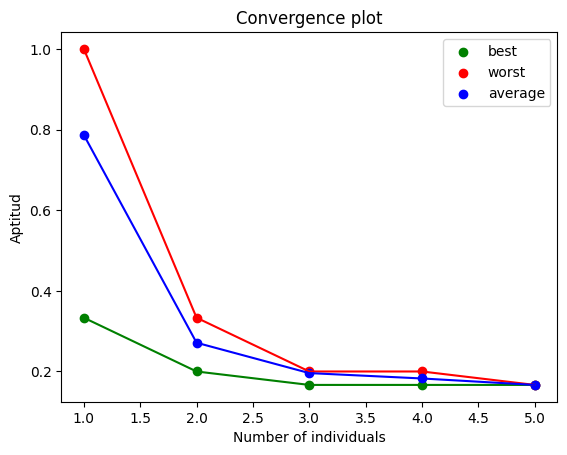

43
79
65
73
65
65
58
57
65
80
79
65
	No. correct sums		Percentage of correct sums obtained
	5.0						41.66666666666667%

0.3333333333333333
1.0
0.25
0.3333333333333333
0.2
0.25
0.16666666666666666
0.2
0.14285714285714285
0.16666666666666666
0.14285714285714285
0.16666666666666666
0.14285714285714285
0.16666666666666666
0.14285714285714285
0.16666666666666666
0.14285714285714285
0.14285714285714285
Numer of iterations needed: 8

Global optimum approximation (best individual) is: [[23, 6, 25, 14, 16, 15, 4, 7, 18, 21, 17, 3, 9, 24, 12, 8, 20, 13, 5, 19, 2, 10, 11, 1, 22], 0.14285714285714285]


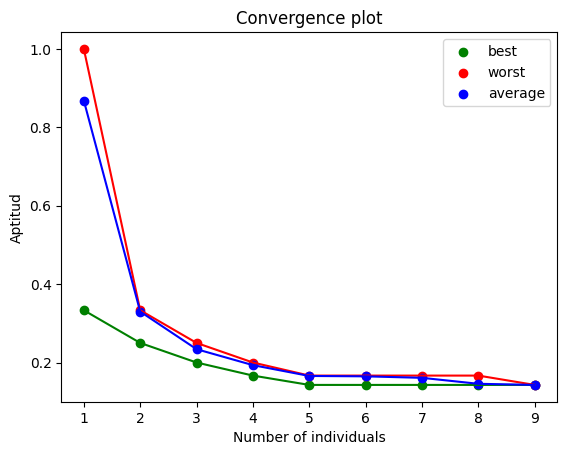

84
65
65
65
46
65
43
65
62
90
63
65
	No. correct sums		Percentage of correct sums obtained
	6.0						50.0%

0.3333333333333333
1.0
0.25
0.3333333333333333
0.25
0.25
Numer of iterations needed: 2

Global optimum approximation (best individual) is: [[25, 21, 18, 7, 3, 1, 6, 14, 20, 24, 17, 5, 2, 23, 10, 11, 16, 13, 15, 9, 22, 8, 4, 12, 19], 0.25]


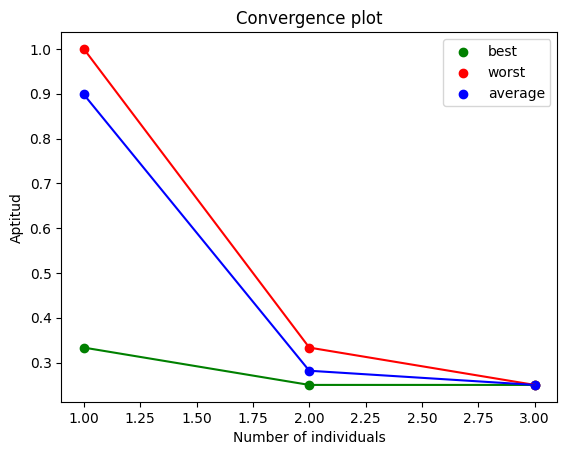

74
65
57
64
65
76
56
51
77
65
67
63
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%

0.5
1.0
0.25
0.25
Numer of iterations needed: 1

Global optimum approximation (best individual) is: [[15, 2, 1, 24, 10, 22, 23, 7, 4, 8, 12, 16, 17, 13, 21, 25, 6, 18, 5, 11, 9, 20, 14, 19, 3], 0.25]


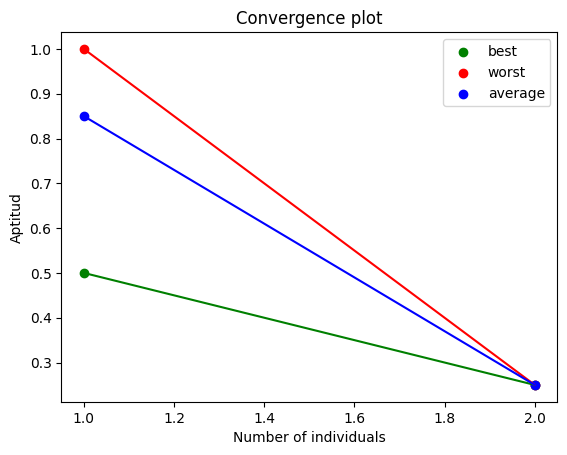

52
64
79
65
65
83
67
57
65
53
63
46
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%

0.3333333333333333
1.0
0.25
0.3333333333333333
0.25
0.25
Numer of iterations needed: 2

Global optimum approximation (best individual) is: [[2, 9, 12, 23, 4, 8, 15, 19, 22, 21, 13, 11, 24, 7, 10, 3, 16, 6, 17, 18, 5, 14, 25, 1, 20], 0.25]


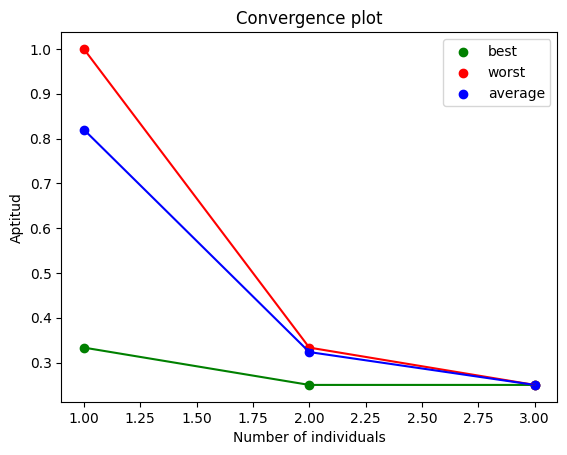

50
85
65
60
65
31
65
86
70
73
78
71
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%

0.3333333333333333
1.0
0.25
0.3333333333333333
0.2
0.25
0.2
0.25
0.2
0.2
Numer of iterations needed: 4

Global optimum approximation (best individual) is: [[16, 19, 6, 21, 3, 22, 4, 18, 12, 25, 1, 15, 17, 8, 24, 14, 23, 7, 13, 20, 10, 5, 2, 11, 9], 0.2]


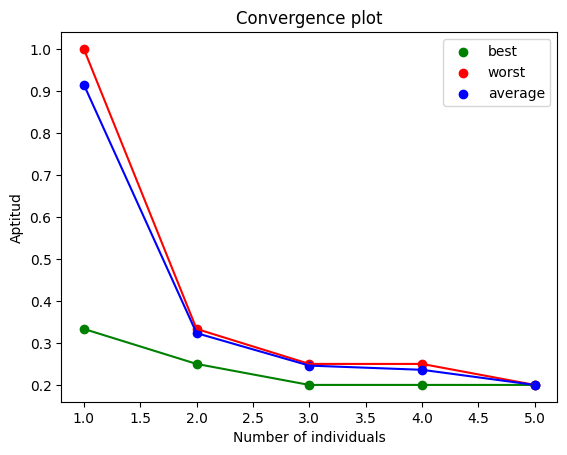

65
81
65
77
37
63
66
50
65
81
59
65
	No. correct sums		Percentage of correct sums obtained
	4.0						33.33333333333333%

0.3333333333333333
1.0
0.25
0.3333333333333333
0.2
0.25
0.16666666666666666
0.2
0.16666666666666666
0.16666666666666666
Numer of iterations needed: 4

Global optimum approximation (best individual) is: [[16, 6, 15, 9, 19, 14, 13, 12, 1, 25, 5, 2, 21, 11, 3, 22, 7, 4, 24, 8, 17, 20, 23, 18, 10], 0.16666666666666666]


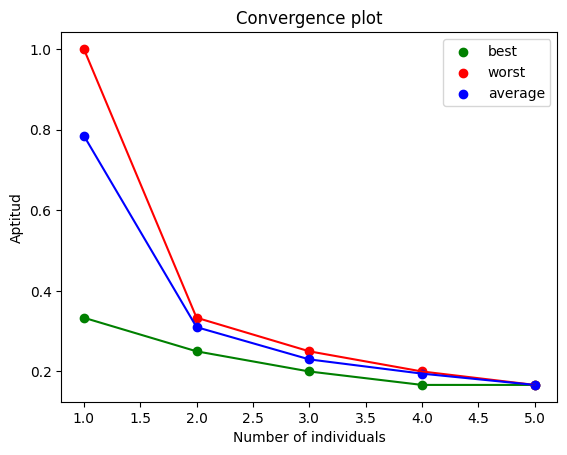

65
65
42
65
88
74
48
75
63
65
84
65
	No. correct sums		Percentage of correct sums obtained
	5.0						41.66666666666667%

0.5
1.0
0.25
0.3333333333333333
0.25
0.3333333333333333
0.2
0.2
Numer of iterations needed: 3

Global optimum approximation (best individual) is: [[14, 18, 17, 23, 19, 4, 24, 21, 7, 12, 13, 6, 16, 25, 5, 9, 15, 10, 3, 11, 8, 2, 1, 20, 22], 0.2]


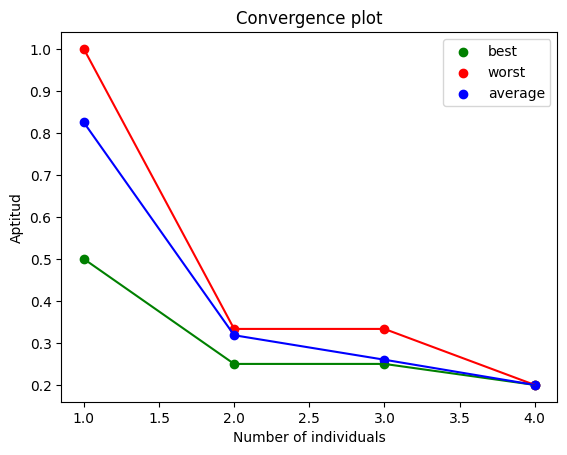

91
68
65
48
53
48
65
65
78
69
79
65
	No. correct sums		Percentage of correct sums obtained
	4.0						33.33333333333333%

0.5
1.0
0.2
0.3333333333333333
0.2
0.25
0.2
0.25
0.2
0.25
0.16666666666666666
0.2
0.16666666666666666
0.16666666666666666
Numer of iterations needed: 6

Global optimum approximation (best individual) is: [[8, 24, 25, 22, 19, 21, 2, 11, 16, 15, 23, 10, 3, 5, 13, 9, 20, 12, 18, 6, 7, 17, 14, 4, 1], 0.16666666666666666]


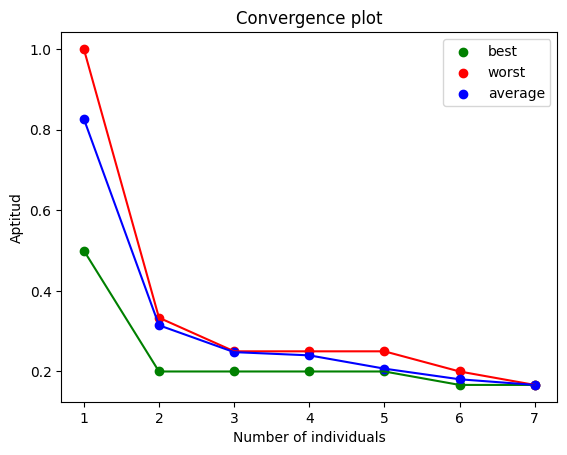

98
65
54
65
43
68
73
65
65
54
32
65
	No. correct sums		Percentage of correct sums obtained
	5.0						41.66666666666667%

0.3333333333333333
1.0
0.25
0.3333333333333333
0.2
0.25
0.2
0.2
Numer of iterations needed: 3

Global optimum approximation (best individual) is: [[12, 6, 15, 9, 22, 14, 25, 1, 18, 20, 24, 13, 23, 7, 11, 3, 2, 17, 10, 8, 5, 19, 16, 21, 4], 0.2]


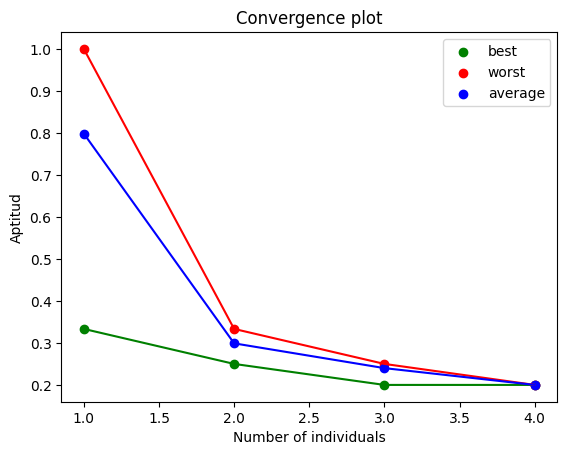

64
78
78
40
65
58
65
72
65
65
74
70
	No. correct sums		Percentage of correct sums obtained
	4.0						33.33333333333333%

0.3333333333333333
1.0
0.25
0.25
Numer of iterations needed: 1

Global optimum approximation (best individual) is: [[13, 3, 4, 16, 6, 9, 12, 5, 17, 22, 20, 7, 8, 10, 1, 25, 14, 18, 11, 15, 23, 24, 2, 19, 21], 0.25]


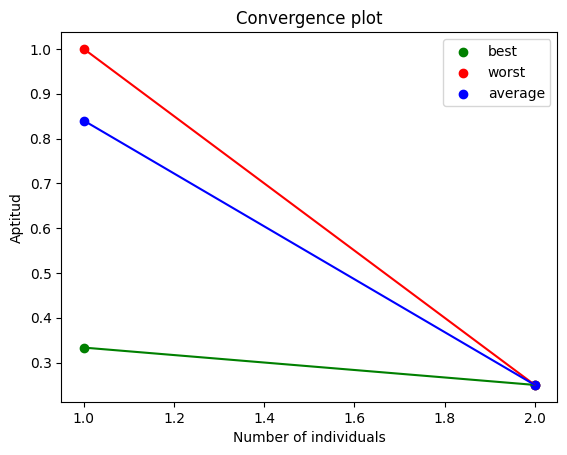

42
65
46
83
89
90
60
37
73
65
65
68
	No. correct sums		Percentage of correct sums obtained
	3.0						25.0%



In [ ]:
magic_constant_table(10)
for i in range(20):
    best, bests, worst, worsts, avgs, iteration = genetic_algo(50, 25, count_cost_fun, .0001)
    conv_plot(bests, worsts, avgs)
    perc_correct_sums(best[0])


		Order n		|		Magic constant
		2		|		5.0
		3		|		15.0
		4		|		34.0
		5		|		65.0
		6		|		111.0
		7		|		175.0
		8		|		260.0
		9		|		369.0
		10		|		505.0
0.5
1.0
0.25
0.3333333333333333
0.25
0.25
Numer of iterations needed: 2

Global optimum approximation (best individual) is: [[21, 18, 42, 37, 14, 30, 13, 33, 22, 46, 20, 11, 4, 39, 27, 15, 16, 44, 38, 12, 32, 40, 19, 17, 45, 36, 49, 26, 9, 29, 2, 34, 28, 48, 10, 35, 31, 5, 3, 23, 41, 1, 8, 47, 43, 7, 25, 6, 24], 0.25]


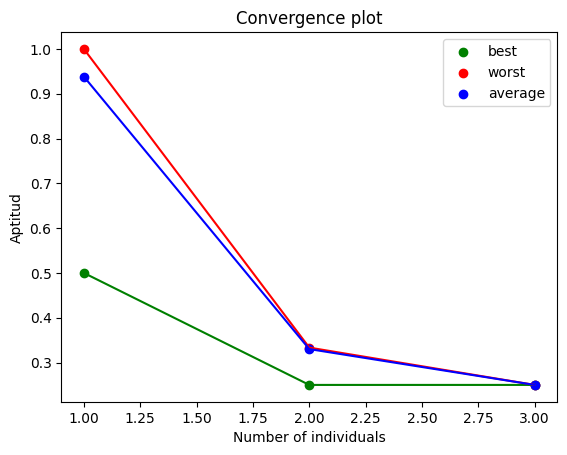

175
175
184
232
160
139
160
173
181
171
190
175
190
145
197
141
	No. correct sums		Percentage of correct sums obtained
	3.0						18.75%

0.5
1.0
0.25
0.5
0.25
0.3333333333333333
0.2
0.25
0.16666666666666666
0.2
0.16666666666666666
0.16666666666666666
Numer of iterations needed: 5

Global optimum approximation (best individual) is: [[9, 15, 40, 47, 17, 33, 44, 28, 10, 5, 20, 29, 41, 42, 1, 39, 3, 21, 30, 49, 32, 38, 27, 19, 24, 14, 13, 45, 34, 36, 48, 18, 8, 23, 11, 6, 22, 12, 7, 31, 16, 43, 2, 26, 37, 4, 46, 35, 25], 0.16666666666666666]


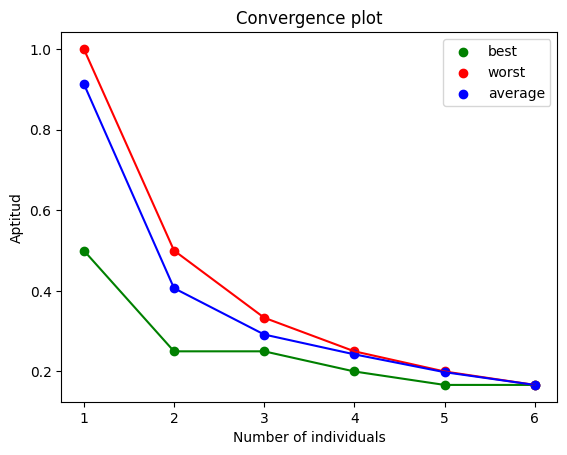

205
175
175
180
178
137
175
118
175
164
141
175
210
242
95
211
	No. correct sums		Percentage of correct sums obtained
	5.0						31.25%

0.5
1.0
0.25
0.3333333333333333
0.25
0.25
Numer of iterations needed: 2

Global optimum approximation (best individual) is: [[24, 7, 37, 23, 5, 39, 11, 2, 43, 41, 48, 32, 13, 35, 46, 44, 19, 20, 26, 17, 3, 40, 16, 47, 29, 15, 9, 45, 42, 36, 38, 18, 4, 34, 28, 12, 8, 10, 6, 49, 27, 25, 1, 21, 14, 31, 33, 30, 22], 0.25]


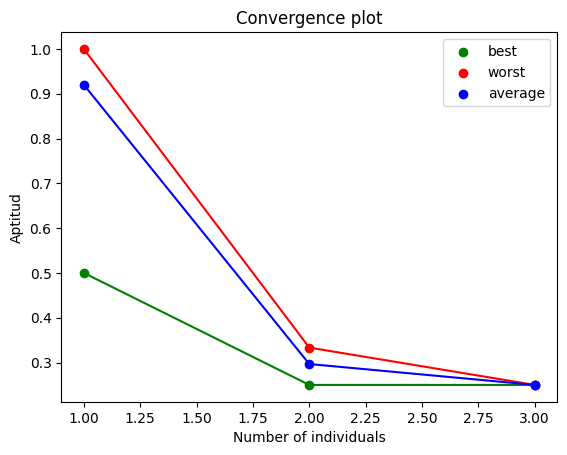

146
214
175
201
200
137
152
167
175
206
175
164
169
169
168
126
	No. correct sums		Percentage of correct sums obtained
	3.0						18.75%

0.5
1.0
0.25
0.3333333333333333
0.2
0.25
0.2
0.2
Numer of iterations needed: 3

Global optimum approximation (best individual) is: [[44, 20, 29, 12, 31, 25, 46, 30, 28, 26, 43, 11, 3, 35, 6, 42, 32, 14, 39, 34, 41, 5, 23, 33, 2, 49, 45, 38, 1, 36, 18, 21, 15, 17, 40, 9, 19, 24, 16, 22, 4, 27, 48, 7, 10, 13, 8, 47, 37], 0.2]


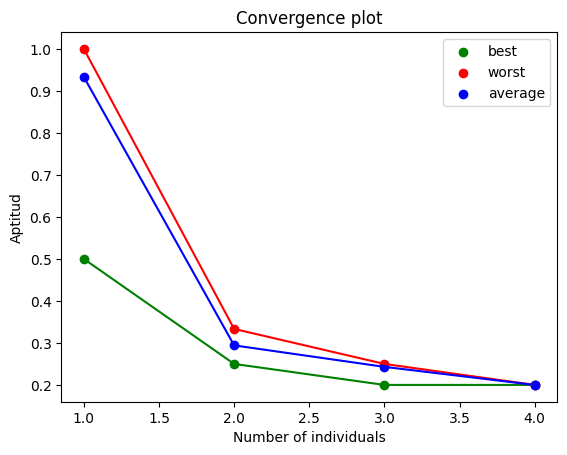

207
176
208
195
148
121
170
143
175
172
121
175
175
264
162
175
	No. correct sums		Percentage of correct sums obtained
	4.0						25.0%

0.3333333333333333
1.0
0.25
0.3333333333333333
0.25
0.3333333333333333
0.2
0.2
Numer of iterations needed: 3

Global optimum approximation (best individual) is: [[45, 47, 40, 1, 25, 42, 39, 17, 7, 26, 44, 19, 28, 34, 33, 30, 3, 22, 32, 12, 9, 15, 18, 11, 27, 46, 37, 36, 10, 35, 8, 6, 14, 24, 5, 41, 43, 49, 13, 2, 4, 23, 31, 48, 38, 21, 16, 20, 29], 0.2]


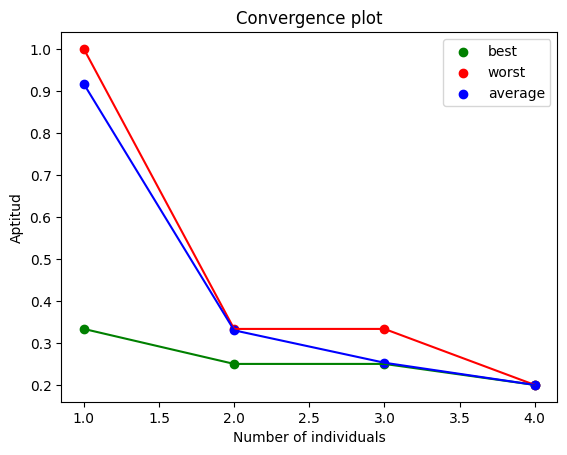

239
175
141
190
102
175
203
192
228
175
134
154
167
175
129
208
	No. correct sums		Percentage of correct sums obtained
	4.0						25.0%

0.3333333333333333
1.0
0.2
0.3333333333333333
0.2
0.25
0.16666666666666666
0.2
0.16666666666666666
0.16666666666666666
Numer of iterations needed: 4

Global optimum approximation (best individual) is: [[29, 36, 15, 11, 39, 27, 18, 37, 6, 9, 20, 13, 34, 17, 7, 23, 4, 5, 14, 42, 28, 3, 2, 26, 31, 45, 43, 25, 41, 1, 33, 38, 35, 16, 21, 49, 32, 24, 40, 44, 48, 19, 12, 8, 10, 30, 47, 46, 22], 0.16666666666666666]


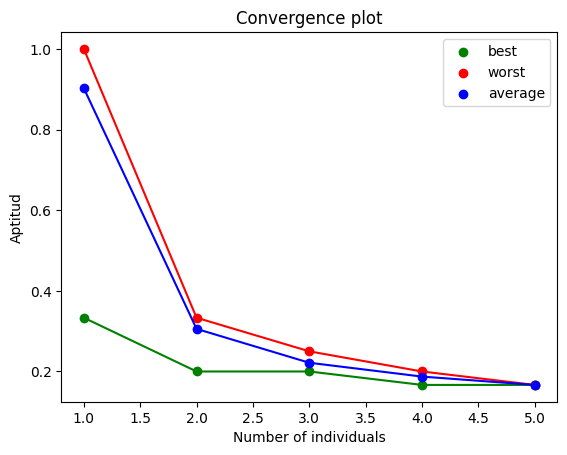

175
136
123
175
185
256
175
178
108
121
175
237
256
150
175
174
	No. correct sums		Percentage of correct sums obtained
	5.0						31.25%

0.3333333333333333
1.0
0.16666666666666666
0.3333333333333333
0.16666666666666666
0.25
0.14285714285714285
0.16666666666666666
0.125
0.14285714285714285
0.125
0.125
Numer of iterations needed: 5

Global optimum approximation (best individual) is: [[23, 18, 1, 10, 17, 47, 31, 35, 6, 12, 39, 25, 21, 37, 34, 11, 29, 26, 24, 7, 33, 20, 5, 40, 16, 43, 2, 49, 14, 46, 30, 22, 32, 9, 15, 41, 45, 48, 3, 4, 42, 38, 8, 44, 19, 13, 28, 36, 27], 0.125]


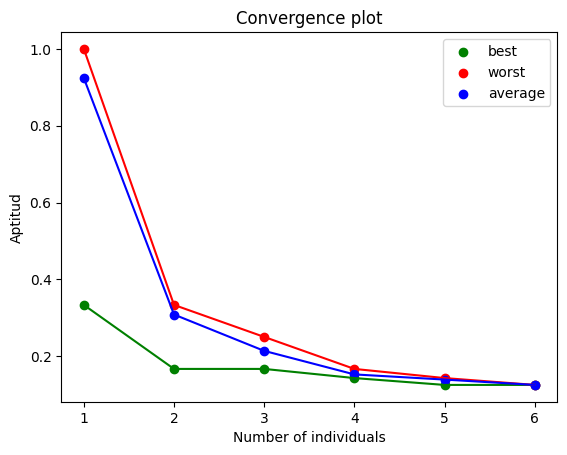

147
175
164
175
168
221
175
175
175
179
129
173
164
230
175
175
	No. correct sums		Percentage of correct sums obtained
	7.0						43.75%

0.5
1.0
0.25
0.3333333333333333
0.25
0.3333333333333333
0.25
0.25
Numer of iterations needed: 3

Global optimum approximation (best individual) is: [[29, 10, 27, 3, 48, 1, 39, 19, 32, 11, 30, 37, 42, 41, 44, 45, 7, 40, 47, 20, 9, 13, 38, 24, 35, 15, 21, 8, 25, 36, 43, 5, 12, 16, 17, 6, 34, 4, 46, 2, 26, 28, 22, 18, 23, 31, 14, 49, 33], 0.25]


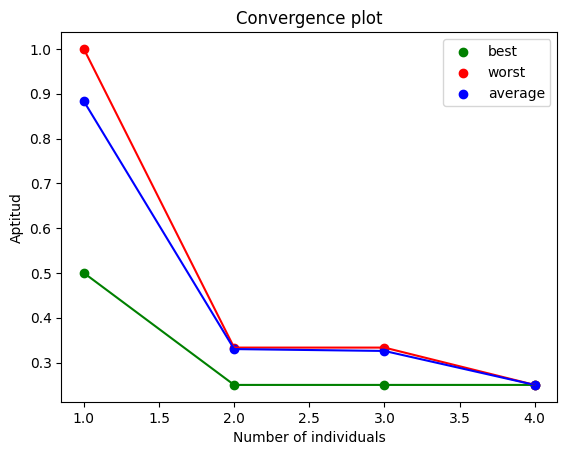

157
212
212
154
154
146
190
158
213
139
190
175
175
175
174
262
	No. correct sums		Percentage of correct sums obtained
	3.0						18.75%

0.5
1.0
0.3333333333333333
0.3333333333333333
Numer of iterations needed: 1

Global optimum approximation (best individual) is: [[20, 3, 28, 16, 13, 4, 39, 2, 36, 42, 12, 1, 23, 37, 44, 27, 22, 25, 38, 5, 35, 18, 31, 46, 10, 33, 45, 15, 48, 26, 40, 11, 24, 32, 49, 30, 17, 6, 9, 47, 34, 7, 8, 41, 19, 29, 14, 21, 43], 0.3333333333333333]


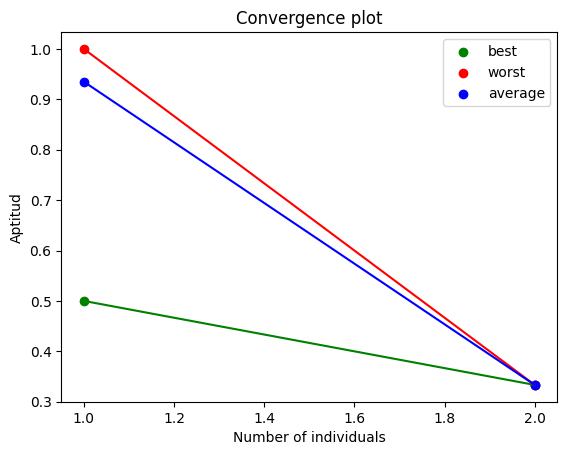

123
153
196
198
230
150
175
170
181
203
112
170
164
225
189
175
	No. correct sums		Percentage of correct sums obtained
	2.0						12.5%

0.3333333333333333
1.0
0.25
0.3333333333333333
0.25
0.3333333333333333
0.25
0.25
Numer of iterations needed: 3

Global optimum approximation (best individual) is: [[47, 5, 4, 3, 39, 8, 14, 12, 32, 17, 2, 10, 19, 18, 46, 42, 34, 6, 26, 25, 27, 1, 7, 49, 37, 22, 35, 21, 16, 41, 28, 36, 20, 9, 24, 30, 40, 45, 15, 44, 31, 38, 11, 13, 43, 29, 23, 48, 33], 0.25]


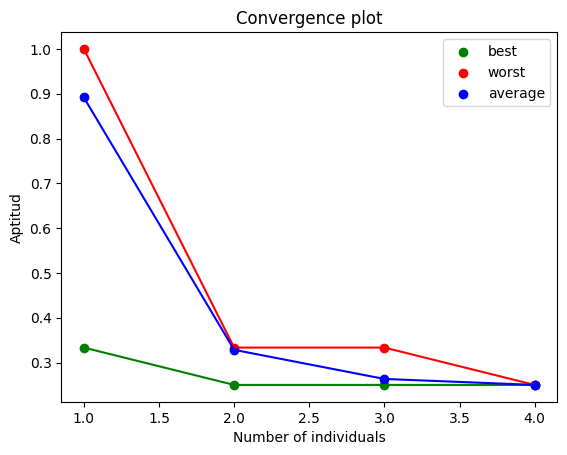

120
110
206
172
174
243
200
163
180
220
128
184
175
175
234
175
	No. correct sums		Percentage of correct sums obtained
	3.0						18.75%

0.3333333333333333
1.0
0.25
0.3333333333333333
0.25
0.25
Numer of iterations needed: 2

Global optimum approximation (best individual) is: [[20, 11, 9, 26, 23, 49, 41, 45, 38, 47, 7, 22, 10, 6, 5, 28, 25, 36, 40, 1, 46, 42, 37, 21, 34, 29, 16, 33, 14, 31, 8, 35, 13, 19, 15, 4, 18, 2, 43, 32, 44, 39, 24, 12, 3, 48, 17, 30, 27], 0.25]


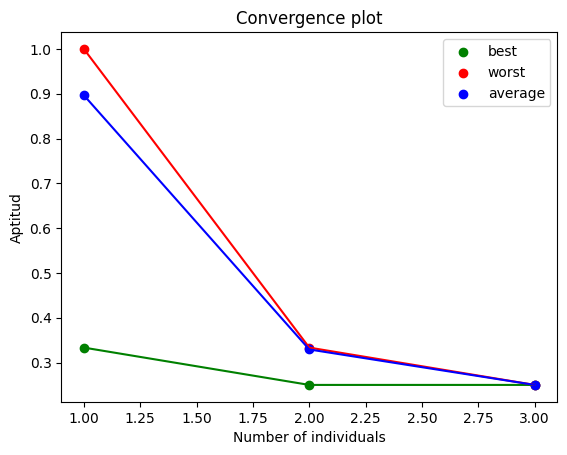

179
175
181
212
135
182
161
154
175
115
229
176
169
207
201
175
	No. correct sums		Percentage of correct sums obtained
	3.0						18.75%

0.5
1.0
0.3333333333333333
0.5
0.2
0.3333333333333333
0.16666666666666666
0.2
0.16666666666666666
0.16666666666666666
Numer of iterations needed: 4

Global optimum approximation (best individual) is: [[15, 17, 34, 8, 7, 48, 46, 39, 44, 30, 13, 1, 19, 27, 3, 10, 20, 49, 32, 40, 31, 18, 11, 33, 25, 21, 26, 37, 45, 43, 2, 41, 16, 5, 23, 12, 28, 14, 35, 24, 6, 38, 29, 22, 42, 4, 36, 47, 9], 0.16666666666666666]


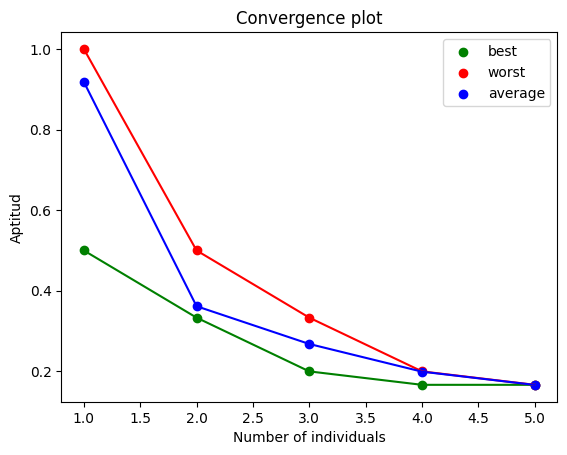

175
173
185
171
175
157
189
161
175
175
175
137
191
211
135
181
	No. correct sums		Percentage of correct sums obtained
	5.0						31.25%

0.3333333333333333
1.0
0.25
0.3333333333333333
0.2
0.25
0.2
0.2
Numer of iterations needed: 3

Global optimum approximation (best individual) is: [[21, 44, 22, 36, 9, 34, 15, 4, 7, 14, 45, 16, 3, 48, 8, 11, 29, 42, 10, 17, 28, 49, 38, 25, 41, 13, 33, 37, 18, 24, 32, 5, 27, 47, 26, 20, 43, 30, 39, 1, 40, 2, 31, 12, 23, 35, 46, 6, 19], 0.2]


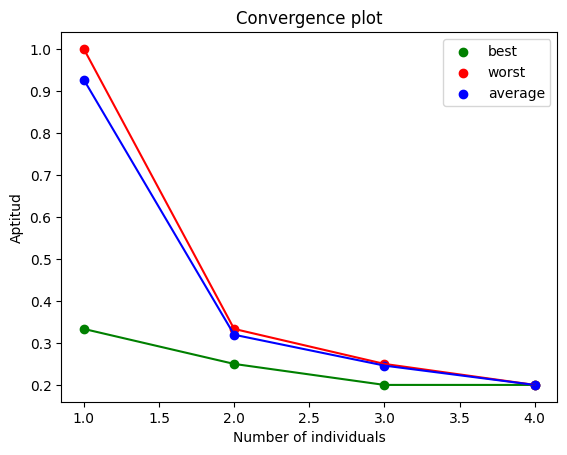

181
137
145
236
179
175
172
151
179
175
243
122
180
175
184
175
	No. correct sums		Percentage of correct sums obtained
	4.0						25.0%

0.3333333333333333
1.0
0.3333333333333333
0.5
0.2
0.3333333333333333
0.2
0.25
0.16666666666666666
0.2
0.16666666666666666
0.16666666666666666
Numer of iterations needed: 5

Global optimum approximation (best individual) is: [[20, 2, 19, 35, 49, 17, 33, 13, 22, 42, 36, 40, 41, 18, 43, 21, 3, 5, 44, 12, 47, 14, 7, 32, 27, 37, 25, 28, 4, 1, 16, 8, 46, 31, 10, 9, 48, 24, 45, 23, 15, 11, 6, 26, 39, 30, 38, 34, 29], 0.16666666666666666]


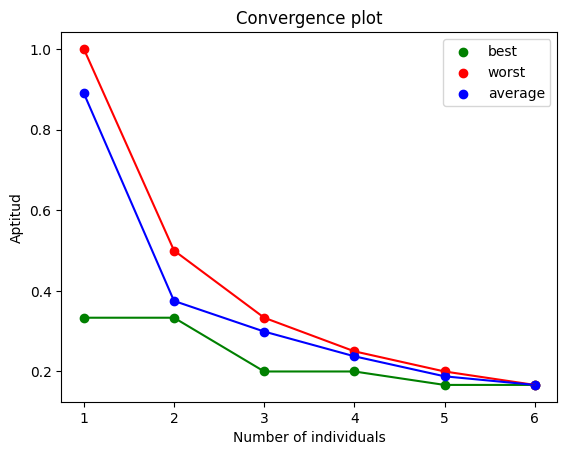

175
212
175
170
116
175
202
109
127
175
186
277
175
176
162
215
	No. correct sums		Percentage of correct sums obtained
	5.0						31.25%

0.3333333333333333
1.0
0.25
0.3333333333333333
0.25
0.25
Numer of iterations needed: 2

Global optimum approximation (best individual) is: [[3, 1, 11, 30, 7, 8, 17, 10, 16, 40, 4, 33, 20, 44, 41, 5, 25, 6, 37, 23, 38, 21, 43, 14, 47, 18, 12, 45, 9, 48, 24, 27, 34, 2, 29, 49, 36, 13, 19, 15, 31, 35, 32, 26, 28, 42, 46, 22, 39], 0.25]


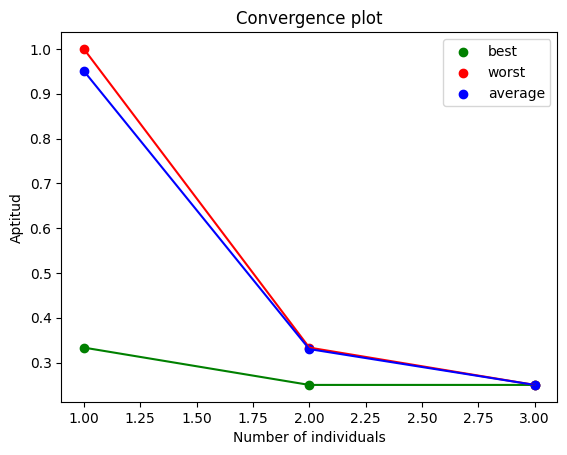

77
167
175
200
173
198
235
165
175
155
175
190
118
247
195
213
	No. correct sums		Percentage of correct sums obtained
	3.0						18.75%

0.5
1.0
0.25
0.3333333333333333
0.2
0.25
0.2
0.25
0.2
0.2
Numer of iterations needed: 4

Global optimum approximation (best individual) is: [[13, 14, 6, 31, 1, 44, 35, 49, 21, 42, 10, 17, 47, 30, 34, 25, 48, 32, 37, 2, 45, 40, 41, 12, 23, 8, 19, 3, 22, 26, 11, 27, 46, 43, 29, 9, 15, 36, 16, 28, 5, 4, 7, 33, 20, 24, 38, 39, 18], 0.2]


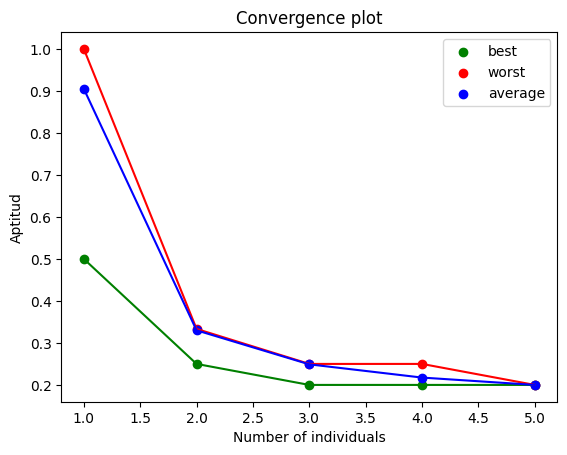

144
216
223
146
204
113
179
174
175
175
163
175
199
164
174
175
	No. correct sums		Percentage of correct sums obtained
	4.0						25.0%

0.3333333333333333
1.0
0.2
0.3333333333333333
0.2
0.3333333333333333
0.2
0.25
0.2
0.25
0.2
0.2
Numer of iterations needed: 5

Global optimum approximation (best individual) is: [[32, 40, 11, 22, 13, 23, 14, 19, 20, 47, 3, 24, 7, 35, 18, 16, 30, 21, 5, 9, 46, 17, 44, 28, 10, 34, 15, 6, 29, 12, 25, 48, 2, 41, 1, 33, 4, 8, 31, 43, 42, 49, 27, 39, 26, 36, 37, 38, 45], 0.2]


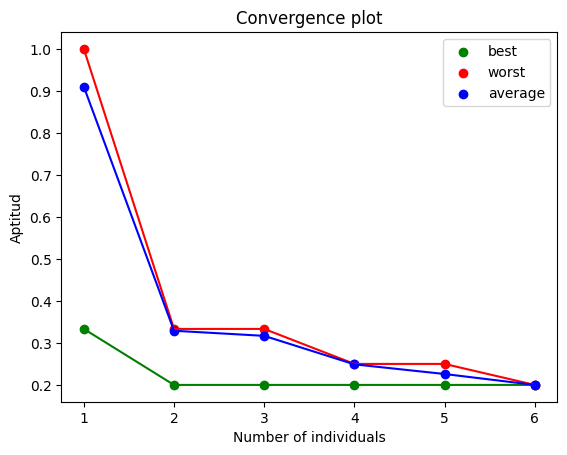

155
155
145
154
158
210
248
175
175
175
171
158
175
196
181
92
	No. correct sums		Percentage of correct sums obtained
	4.0						25.0%

0.5
1.0
0.25
0.3333333333333333
0.2
0.3333333333333333
0.2
0.2
Numer of iterations needed: 3

Global optimum approximation (best individual) is: [[4, 15, 2, 5, 10, 6, 12, 22, 48, 44, 13, 25, 33, 38, 1, 32, 21, 34, 31, 19, 36, 11, 42, 35, 39, 24, 28, 17, 43, 27, 23, 14, 8, 40, 20, 45, 18, 16, 41, 30, 29, 49, 3, 37, 9, 46, 47, 7, 26], 0.2]


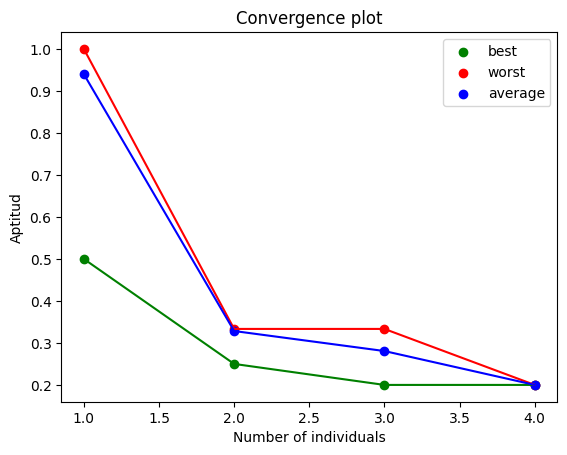

54
223
174
196
175
228
175
129
219
150
192
175
162
198
175
159
	No. correct sums		Percentage of correct sums obtained
	4.0						25.0%

0.5
1.0
0.25
0.3333333333333333
0.25
0.25
Numer of iterations needed: 2

Global optimum approximation (best individual) is: [[30, 1, 26, 16, 32, 11, 21, 37, 7, 44, 8, 6, 35, 38, 22, 31, 4, 18, 17, 40, 48, 49, 42, 28, 41, 36, 47, 14, 19, 5, 34, 23, 39, 9, 27, 2, 15, 3, 43, 20, 10, 24, 12, 33, 46, 29, 25, 13, 45], 0.25]


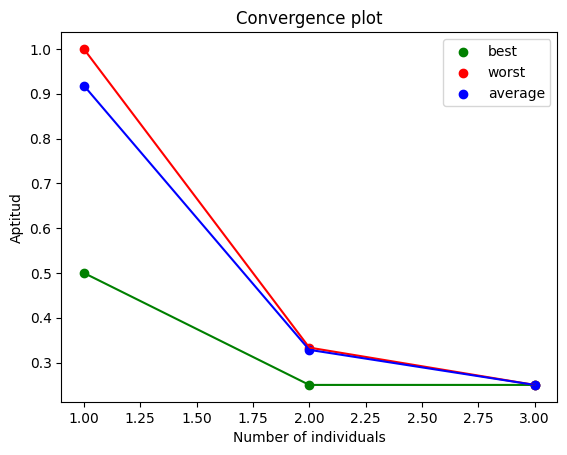

137
175
180
257
156
117
203
171
134
185
178
175
165
217
176
175
	No. correct sums		Percentage of correct sums obtained
	3.0						18.75%

0.5
1.0
0.25
0.3333333333333333
0.25
0.3333333333333333
0.2
0.25
0.2
0.2
Numer of iterations needed: 4

Global optimum approximation (best individual) is: [[10, 17, 48, 37, 24, 7, 44, 40, 4, 8, 47, 1, 33, 15, 25, 49, 5, 38, 42, 14, 2, 12, 26, 30, 39, 27, 6, 19, 18, 31, 21, 28, 16, 46, 23, 20, 36, 29, 9, 43, 3, 35, 32, 13, 34, 45, 22, 41, 11], 0.2]


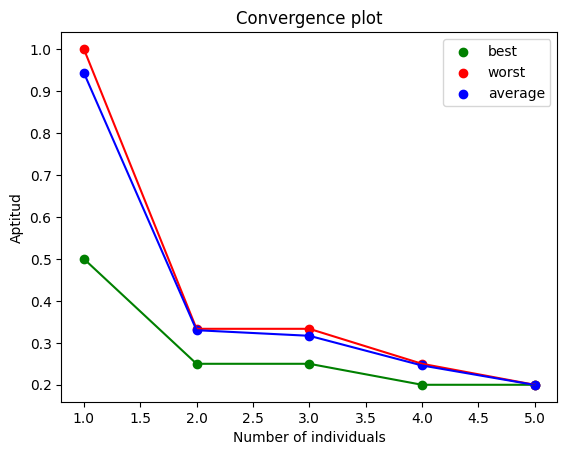

187
148
175
159
183
175
198
157
176
175
243
175
150
149
88
247
	No. correct sums		Percentage of correct sums obtained
	4.0						25.0%



In [ ]:
magic_constant_table(10)
for i in range(20):
    best, bests, worst, worsts, avgs, iteration = genetic_algo(100, 49, count_cost_fun, .0001)
    conv_plot(bests, worsts, avgs)
    perc_correct_sums(best[0])

# Discusión

• ¿Cual fue la función objetivo que encontró más rápido el cuadrado mágico?
En mi caso obtuve mejores resultados con la función de conteo de éxitos.
• ¿Como modificaría el algoritmo para encontrar todos los posibles cuadrados magicos? (recuerde que existe mas de una solución)
Es complicado, pues no pude llegar al cuadrado mágico, pero tuve resultados cercanos para el caso n = 5, pero pienso que usando tabú se puede mejorar bastante el algoritmo.
• ¿Modifico los parámetros de su algoritmo para los diferentes tamaños del cuadrado mágico (n = 5 y n = 7)? Si su respuesta es afirmativa ¿cuáles?
Para ambos tamaños dejé los mismos parámetros, pues quería comparar el algoritmo con los distintos tamaños.
• Mencione en promedio cuanto tardo en ejecutarse el algoritmo por cada caso de prueba.
En promedio, por cada iteración completa se tardó 3 minutos, con una población de 500 individuos.
